# **Wstęp**
Celem niniejszej pracy jest przeprowadzenie kompleksowej analizy porównawczej trzech wybranych utworów literackich H.P. Lovecrafta: The Call of Cthulhu, The Dunwich Horror oraz The Shadow over Innsmouth, z wykorzystaniem narzędzi i metod przetwarzania języka naturalnego (Natural Language Processing – NLP). Przedmiotem analizy są pełne teksty dzieł, rozdzielone na rozdziały i akapity, co umożliwia badanie struktury i stylu pisarskiego autora zarówno na poziomie pojedynczych zdań i tokenów, jak i całych rozdziałów, akapitów i książek.

W pierwszym etapie pracy teksty zostały poddane wstępnemu przetwarzaniu, obejmującemu czyszczenie, normalizację, tokenizację oraz lematyzację przy użyciu biblioteki spaCy. W dalszej analizie przeprowadzono selekcję terminów, eliminując słowa nieistotne lub nieprzynoszące wartości informacyjnej, co umożliwiło skoncentrowanie się na jednostkach leksykalnych mających znaczenie semantyczne i stylistyczne. Następnie wykonano analizę częstości słów, co pozwoliło na stworzenie chmur słów zarówno dla terminów wspólnych dla dwóch dzieł, jak i dla słownictwa charakterystycznego dla poszczególnych utworów.

W kolejnych etapach zastosowano metody porównania podobieństwa między książkami i ich rozdziałami w oparciu o reprezentacje wektorowe tekstu. Wykorzystano dwa podejścia: klasyczne reprezentacje Tf-Idf oraz osadzenia semantyczne (word embeddings) generowane za pomocą modeli spaCy. Uzyskane reprezentacje posłużyły do przeprowadzenia grupowania rozdziałów metodą k-średnich (K-Means clustering), co pozwoliło na ocenę, czy poszczególne fragmenty tekstu mogą być skutecznie przypisane do dzieł, z których pochodzą.

Równolegle przeprowadzono analizę tematyczną (topic modeling) z zastosowaniem modelu LDA (Latent Dirichlet Allocation), umożliwiającą wyodrębnienie dominujących tematów w każdej z książek oraz przypisanie rozdziałów do utworów na podstawie ich tematycznej struktury.

W końcowej części projektu skupiono się na zadaniu klasyfikacji akapitów do odpowiadających im dzieł. W tym celu wykorzystano trzy klasyfikatory: Logistic Regression, MLPClassifier oraz SVM, testując różne reprezentacje tekstu: wagi binarne, logarytmiczne, Tf-Idf oraz osadzenia semantyczne. Wyniki klasyfikacji zostały porównane pod względem skuteczności, co umożliwiło identyfikację najlepszego modelu w kontekście przyjętego zadania.

Uzupełnieniem analizy była eksploracja nastroju poszczególnych rozdziałów, przeprowadzona z wykorzystaniem biblioteki TextBlob i Vader. Ocenie poddano biegunowość polaryzację tekstu w ramach każdego rozdziału. Wyniki zilustrowano wykresami ukazującymi zmienność nastroju w strukturze utworu. Dodatkowo, w celu głębszego wglądu w emocjonalny wydźwięk tekstów, zastosowano leksykon NRC Emotion Lexicon, który umożliwił zliczenie wystąpień słów związanych z ośmioma podstawowymi emocjami (takimi jak strach, gniew, radość czy smutek) i stworzenie profilu emocjonalnego dla każdej książki. Pozwoliło to na jakościowe i ilościowe porównanie emocjonalnej tonacji dzieł Lovecrafta.

# Przygotowanie korpusu

spacy – biblioteka do przetwarzania języka naturalnego, m.in. tokenizacji, lematyzacji i tworzenia embeddingów.

wordcloud – biblioteka do generowania chmur słów na podstawie częstości występowania słów.

gensim – biblioteka do modelowania tematów (m.in. LDA) i pracy z reprezentacjami wektorowymi tekstu.

pyLDAvis – narzędzie do interaktywnej wizualizacji modeli LDA.

en_core_web_md – średniej wielkości angielski model językowy SpaCy zawierający wektory słów, używany do lematyzacji i obliczeń semantycznych.

In [ ]:
!pip install spacy
!pip install wordcloud
!pip install gensim
!pip install pyLDAvis
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 19.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Ten fragment kodu importuje wszystkie niezbędne biblioteki do przetwarzania tekstu, analizy danych, modelowania tematycznego, klasyfikacji oraz wizualizacji wyników. Na końcu ładowany jest model językowy SpaCy.

spacy – przetwarzanie tekstu (tokenizacja, lematyzacja, embeddingi).
re – wyrażenia regularne, używane do czyszczenia tekstu.
numpy, pandas – operacje numeryczne i manipulacja danymi.
matplotlib.pyplot, seaborn – tworzenie wykresów i wizualizacji.
scipy.cluster, scipy.spatial.distance – hierarchiczne grupowanie i obliczenia odległości.
collections (defaultdict, Counter) – struktury danych do zliczania i grupowania informacji.
requests, BeautifulSoup – pobieranie i parsowanie danych z internetu (np. z Project Gutenberg).
copy – tworzenie kopii danych.
textblob – analiza nastroju tekstu.
sklearn.feature_extraction.text – przekształcanie tekstu do form reprezentacyjnych (TF-IDF, Count).
sklearn.metrics – obliczanie podobieństwa, jakości klasyfikacji i tworzenie macierzy pomyłek.
sklearn.cluster, sklearn.decomposition – klasteryzacja KMeans i redukcja wymiarów PCA.
gensim – modelowanie tematów LDA.
pyLDAvis – wizualizacja wyników LDA.
sklearn.model_selection – podział danych na zbiory treningowe i testowe.
sklearn.linear_model, sklearn.neural_network, sklearn.svm – klasyfikatory: regresja logistyczna, sieć neuronowa i SVM.
Na końcu kodu uruchamiany jest model en_core_web_md SpaCy, który będzie używany do przetwarzania języka angielskiego z wykorzystaniem wektorów słów.

In [ ]:
import spacy
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import defaultdict
import requests
from bs4 import BeautifulSoup
import copy
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim import corpora, models
from pprint import pprint
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import os

nlp = spacy.load("en_core_web_md")

Ten fragment kodu wczytuje zawartość trzech plików tekstowych (trzech książek) do zmiennych w Pythonie. Każda książka jest otwierana z podanej ścieżki na dysku, a jej zawartość jest odczytywana jako tekst w kodowaniu UTF-8 i zapisywana do odpowiednich zmiennych.

In [ ]:
# Ścieżka do folderu 'data' względem lokalizacji skryptu
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
DATA_DIR = os.path.join(BASE_DIR, 'data')

#Wczytanie książek
with open(os.path.join(DATA_DIR, "the_call_of_cthulhu.txt"), encoding='utf-8') as plik:
    The_Call_of_Cthulu = plik.read()

with open(os.path.join(DATA_DIR, "the_dunwich_horror.txt"), encoding='utf-8') as plik:
    The_Dunwich_Horror = plik.read()

with open(os.path.join(DATA_DIR, "the_shadow_over_innsmouth.txt"), encoding='utf-8') as plik:
    The_Shadow_over_Innsmouth = plik.read()

3 funkcje, która dzielą tekst książki na rozdziały oznaczone numerami rzymskimi, liczbą w nowej lini lub  _1. nazwa_ w zależności od książki. Najpierw usuwa nagłówki i stopki Project Gutenberg (wszystko przed markerem START i po markerze END). Następnie dzieli tekst na rozdziały. Zwraca słownik, gdzie kluczami są nazwy rodziałów, a wartościami – tekst danego rozdziału.

In [ ]:
def split_roman_chapters(text):

    # Oznaczenie początku książki
    start_pattern = r'\*\*\* START OF THE PROJECT GUTENBERG.*\*\*\*'
    # Oznaczenie końca książki
    end_pattern = r'\*\*\* END OF THE PROJECT GUTENBERG.*\*\*\*'

    # Usuń to, co przed START
    start_match = re.search(start_pattern, text)
    if start_match:
        text = text[start_match.end():]

    # Usuń to, co po END
    end_match = re.search(end_pattern, text)
    if end_match:
        text = text[:end_match.start()]

    # Wzorzec: liczby rzymskie w osobnej linii (np. I, II, XIV)
    pattern = r'(?m)^\s*([IVXLCDM]+)\s*$'
    parts = re.split(pattern, text)

    chapters = {}
    for i in range(1, len(parts), 2):
        chapter_num = parts[i]
        chapter_text = parts[i + 1].strip() if i + 1 < len(parts) else ""
        chapters[chapter_num] = chapter_text

    return chapters

In [ ]:
def split_numeric_chapters(text):

    # Oznaczenie początku książki
    start_pattern = r'\*\*\* START OF THE PROJECT GUTENBERG.*\*\*\*'
    # Oznaczenie końca książki
    end_pattern = r'\*\*\* END OF THE PROJECT GUTENBERG.*\*\*\*'

    # Usuń to, co przed START
    start_match = re.search(start_pattern, text)
    if start_match:
        text = text[start_match.end():]

    # Usuń to, co po END
    end_match = re.search(end_pattern, text)
    if end_match:
        text = text[:end_match.start()]

    # Wzorzec: liczba w osobnej linii
    pattern = r'(?m)^\s*(\d+)\s*$'
    parts = re.split(pattern, text)

    chapters = {}
    for i in range(1, len(parts), 2):
        chapter_num = parts[i]
        chapter_text = parts[i + 1].strip() if i + 1 < len(parts) else ""
        chapters[chapter_num] = chapter_text

    return chapters

In [ ]:
def split_The_Call_of_Cthulu(text):

    # Oznaczenie początku książki
    start_pattern = r'\*\*\* START OF THE PROJECT GUTENBERG.*\*\*\*'
    # Oznaczenie końca książki
    end_pattern = r'\*\*\* END OF THE PROJECT GUTENBERG.*\*\*\*'

    # Usuń to, co przed START
    start_match = re.search(start_pattern, text)
    if start_match:
        text = text[start_match.end():]

    # Usuń to, co po END
    end_match = re.search(end_pattern, text)
    if end_match:
        text = text[:end_match.start()]


    # Podział na rozdziały wg podkreśleń, np. _1. A Result and a Prologue_
    pattern = r'_(\d+\..*?)_'
    parts = re.split(pattern, text)

    chapters = {}
    for i in range(1, len(parts), 2):
        chapter_title = parts[i].strip()
        chapter_text = parts[i+1].strip() if i+1 < len(parts) else ""
        chapters[chapter_title] = chapter_text
    return chapters

Ten fragment kodu dzieli wczytane wcześniej teksty książek na rozdziały, korzystając z różnych funkcji dopasowanych do formatu danej książki. Wynik zapisywany jest w słownikach, gdzie kluczem jest numer rozdziału, a wartością jego tekst. Na końcu wyświetlana jest liczba rozdziałów dla każdej z książek.

In [ ]:
#Wczytanie rodziałów w formie słownika rodział:tekst
chapters_The_Call_of_Cthulu = split_The_Call_of_Cthulu(The_Call_of_Cthulu)
chapters_The_Dunwich_Horror = split_numeric_chapters(The_Dunwich_Horror)
chapters_The_Shadow_over_Innsmouth = split_roman_chapters(The_Shadow_over_Innsmouth)

print(f"Liczba rozdziałów The_Call_of_Cthulus: {len(chapters_The_Call_of_Cthulu)}")
print(f"Liczba rozdziałów The_Dunwich_Horror: {len(chapters_The_Dunwich_Horror)}")
print(f"Liczba rozdziałów The_Shadow_over_Innsmouth: {len(chapters_The_Shadow_over_Innsmouth)}")


Liczba rozdziałów The_Call_of_Cthulus: 3
Liczba rozdziałów The_Dunwich_Horror: 10
Liczba rozdziałów The_Shadow_over_Innsmouth: 5


Funkcja preprocess_text przetwarza tekst, wykonując tokenizację i czyszczenie za pomocą spaCy. Najpierw usuwa nadmiarowe spacje, zamienia tekst na małe litery, a następnie tworzy tokeny, które są lematyzowane. Filtruje tokeny, pozostawiając tylko słowa alfabetyczne, niebędące stopwords, dłuższe niż 2 znaki oraz nieznajdujące się na dodatkowej liście wykluczonych słów (custom stopwords). Wynikiem jest lista oczyszczonych i znormalizowanych tokenów.

In [ ]:
# fumkcja do tokenizacji i czyszczenia tekstu spacy
def preprocess_text(text):
    my_stopwords = {"new", "state", "mean", "ba", "set", "one", "man", "tell", "come", "like", "know", "see", "say", "look", "obe", "aout", "go", "open", "heh"} #dodatkowe stopwords
    text = re.sub(r'\s+', ' ', text)
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and not token.is_stop and len(token) > 2 and token.lemma_ not in my_stopwords
    ]
    return tokens

Funkcja porownaj_rozdzialy oblicza macierz podobieństwa pomiędzy rozdziałami danej książki. Przyjmuje słownik rozdziałów (klucz: nazwa rozdziału, wartość: tekst), tworzy dokumenty spaCy dla każdego rozdziału, a następnie wylicza parzyste podobieństwo (similarity) między wszystkimi rozdziałami, zapisując wyniki w macierzy. Zwraca tę macierz oraz listę obiektów dokumentów.

In [ ]:
# funkcja porównująca rozdziały
def porownaj_rozdzialy(ksiazka):
    rozdzialy = list(ksiazka.keys())
    korpus = list(ksiazka.values())
    docs = [nlp(tekst) for tekst in korpus]
    n = len(docs)
    sim_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            sim_matrix[i, j] = docs[i].similarity(docs[j])

    return sim_matrix, docs

Funkcja rysuj_heatmap tworzy i wyświetla wykres typu heatmap dla podanej macierzy podobieństwa między dokumentami. Używa biblioteki seaborn do wizualizacji.

In [ ]:
# funkcja rysująca heatmap
def rysuj_heatmap(sim_matrix, tytul):
  plt.figure(figsize=(10, 8))
  sns.heatmap(sim_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
  plt.title(f"Macierz podobieństwa dokumentów {tytul}")
  plt.xlabel("Dokument")
  plt.ylabel("Dokument")
  plt.show()

Ta funkcja split_chapters_to_paragraphs dzieli teksty rozdziałów na paragrafy, rozdzielając je po podwójnych znakach nowej linii.Następnie zwraca listę przefiltrowanych paragrafów gotowych do dalszej analizy lub klasyfikacji.

In [ ]:
# funkcja do podziału rodziału na paragrafy (do klasyfikacji)
def split_chapters_to_paragraphs(chapters, min_length=50):
    paragraphs = []
    for chapter_title, chapter_text in chapters.items():
        # Podział na paragrafy po podwójnym znaku nowej linii
        raw_paragraphs = re.split(r'\n{2,}', chapter_text)
        # Filtruj paragrafy wg minimalnej długości (żeby nie brać pustych lub bardzo krótkich)
        filtered_paragraphs = [p.strip() for p in raw_paragraphs if len(p.strip()) >= min_length]
        paragraphs.extend(filtered_paragraphs)
    return paragraphs

In [ ]:
# Podział rozdziałów na akapity
paragraphs_Cthulu = split_chapters_to_paragraphs(chapters_The_Call_of_Cthulu)
paragraphs_Dunwich = split_chapters_to_paragraphs(chapters_The_Dunwich_Horror)
paragraphs_Innsmouth = split_chapters_to_paragraphs(chapters_The_Shadow_over_Innsmouth)

In [ ]:
# Wstępne przetwarzanie tekstów (tokenizacja, czyszczenie, itp.)
processed_paragraphs_Cthulu = [preprocess_text(p) for p in paragraphs_Cthulu]
processed_paragraphs_Dunwich = [preprocess_text(p) for p in paragraphs_Dunwich]
processed_paragraphs_Innsmouth = [preprocess_text(p) for p in paragraphs_Innsmouth]

Ten fragment kodu tworzy korpus tekstów do analizy oraz odpowiadającą mu listę etykiet. Korpus jest zbiorem wszystkich paragrafów ze wszystkich trzech książek, gdzie każdy paragraf to połączone tokeny w jeden ciąg znaków. Równocześnie powstaje lista etykiet (true_labels_paragraphs), przypisująca każdemu paragrafowi nazwę książki, z której pochodzi — co umożliwi późniejszą klasyfikację tekstów.

In [ ]:
#Tworzenie korpusu wszystkich ksiązek jako listy paragrafów i lista etykiet klas do klasyfikacji
all_docs_paragraphs = [' '.join(tokens) for tokens in processed_paragraphs_Cthulu + processed_paragraphs_Dunwich + processed_paragraphs_Innsmouth]
true_labels_paragraphs = (
    ['Cthulhu'] * len(processed_paragraphs_Cthulu) +
    ['Dunwich'] * len(processed_paragraphs_Dunwich) +
    ['Innsmouth'] * len(processed_paragraphs_Innsmouth)
)

Ten kod przetwarza każdy paragraf tekstu z trzech książek za pomocą modelu NLP. Dla każdego paragrafu tworzy obiekt Doc, który zawiera m.in. wektor reprezentujący semantykę tekstu. Dzięki temu paragrafy są gotowe do dalszej analizy.

In [ ]:
#wekotry paragafów z nlp
docs_Cthulu_paragraphs = [nlp(tekst) for tekst in paragraphs_Cthulu]
docs_Dunwich_paragraphs = [nlp(tekst) for tekst in paragraphs_Dunwich]
docs_Innsmouth_paragraphs = [nlp(tekst) for tekst in paragraphs_Innsmouth]

Ten kod łączy listy obiektów Doc reprezentujących paragrafy z trzech książek w jeden zbiorczy korpus oraz tworzy odpowiadającą listę etykiet klas, które oznaczają, z której książki pochodzi dany paragraf.

In [ ]:
# Korpus wszystkich paragrafów w formie listy i lista etykiet klas do klasyfikacji
all_docs_paragraphs_embedings = docs_Cthulu_paragraphs + docs_Dunwich_paragraphs + docs_Innsmouth_paragraphs
true_labels_paragraphs_embedings = (
    ['Cthulhu'] * len(docs_Cthulu_paragraphs) +
    ['Dunwich'] * len(docs_Dunwich_paragraphs) +
    ['Innsmouth'] * len(docs_Innsmouth_paragraphs)
)

Ten kod przetwarza teksty rozdziałów każdej książki, tworząc słowniki, gdzie kluczem jest numer lub tytuł rozdziału, a wartością lista tokenów (przetworzony tekst) uzyskana dzięki funkcji preprocess_text. Dzięki temu każdy rozdział jest reprezentowany jako oczyszczona i znormalizowana lista słów gotowa do dalszej analizy.

In [ ]:
# Preprocessing rozdziałów - słownik z tokenami
processed_The_Call_of_Cthulu = {num: preprocess_text(text) for num, text in chapters_The_Call_of_Cthulu.items()}
processed_The_Dunwich_Horror = {title: preprocess_text(text) for title, text in chapters_The_Dunwich_Horror.items()}
processed_The_Shadow_over_Innsmouth = {title: preprocess_text(text) for title, text in chapters_The_Shadow_over_Innsmouth.items()}

Ten fragment kodu wykonuje analizę podobieństwa pomiędzy rozdziałami w każdej z trzech książek. Funkcja porownaj_rozdzialy przekształca teksty rozdziałów w reprezentacje wektorowe i oblicza macierz podobieństwa, a następnie rysuj_heatmap wizualizuje te macierze w formie map cieplnych. Dzięki temu można łatwo ocenić, które rozdziały w danej książce są do siebie najbardziej podobne pod względem treści.

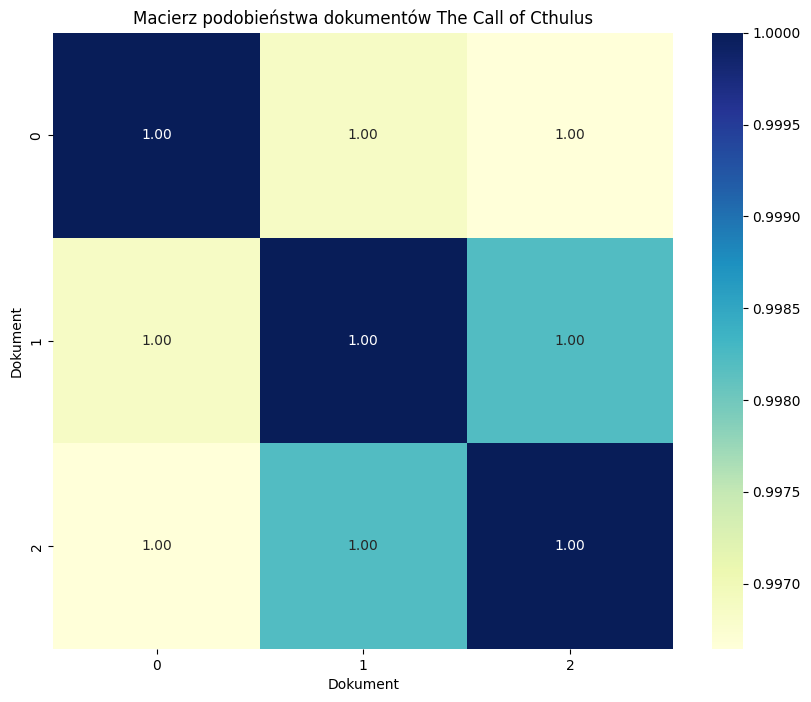

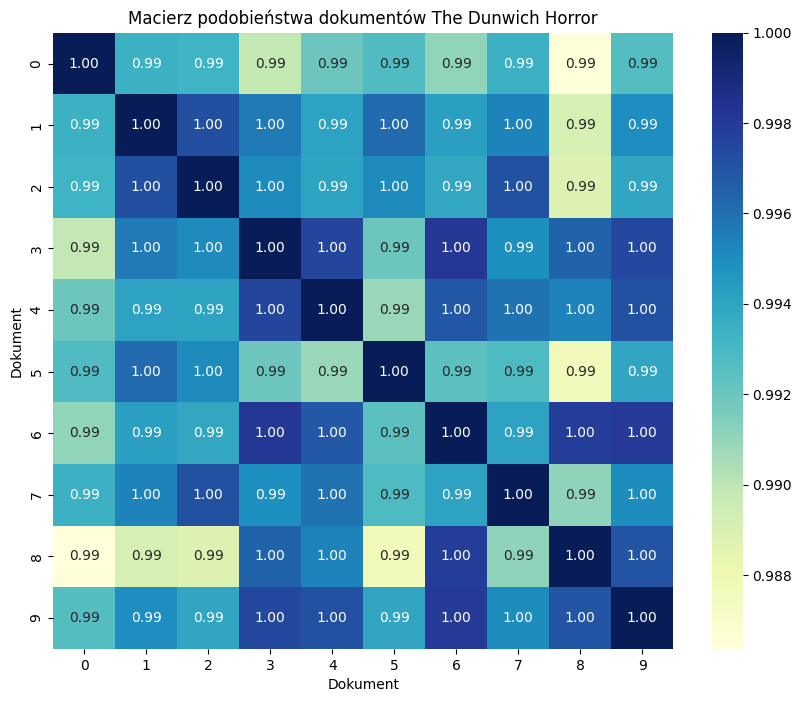

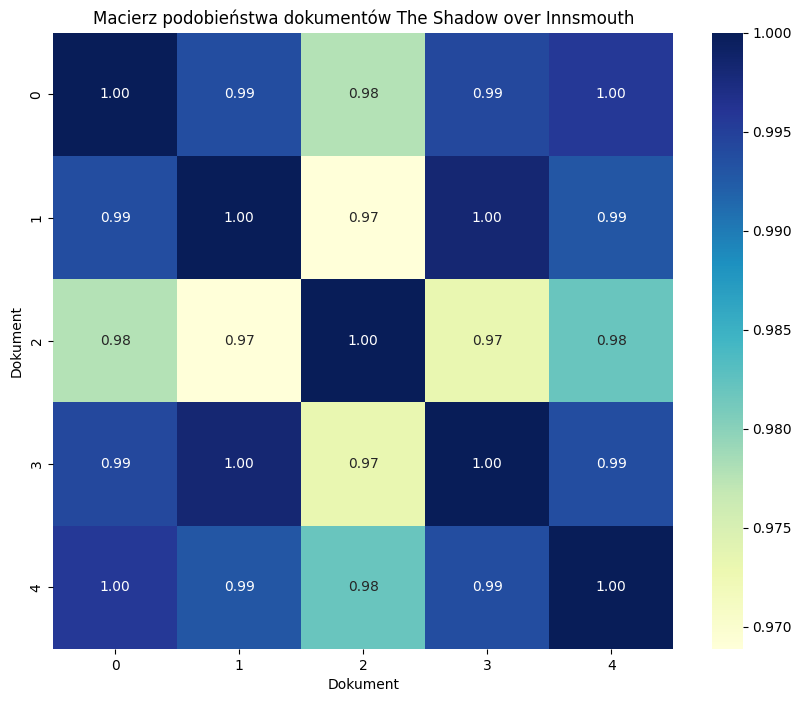

In [ ]:
# Wywołanie funkcji porównującej rozdziały
simmatrix_Cthulu, docs_Cthulu = porownaj_rozdzialy(chapters_The_Call_of_Cthulu)
simmatrix_Dunwich, docs_Dunwich = porownaj_rozdzialy(chapters_The_Dunwich_Horror)
simmatrix_Innsmouth, docs_Innsmouth = porownaj_rozdzialy(chapters_The_Shadow_over_Innsmouth)

# porównanie rodziałów pod względem ich podobieństwa
rysuj_heatmap(simmatrix_Cthulu, "The Call of Cthulus")
rysuj_heatmap(simmatrix_Dunwich, "The Dunwich Horror")
rysuj_heatmap(simmatrix_Innsmouth, "The Shadow over Innsmouth")

Macierze podobieństwa wykonane za pomocą dokumentów spacy nie wykazują znacznych różnic pomiędzy rozdziałami w książce. W celu dalszego zbadania tego zagadnienia dokonano kolejnej analizy w dalszej części kodu.

# Porównanie różnic między książkami
Ten fragment kodu dokonuje porównania semantycznego całych książek na podstawie wektorów osadzonych generowanych przez model językowy spaCy. Najpierw poszczególne rozdziały każdej książki są łączone w jeden ciąg znaków, a następnie teksty są przetwarzane w celu oczyszczenia i normalizacji. Dla każdej książki tworzony jest dokument spaCy, który reprezentuje ją jako wektor semantyczny.

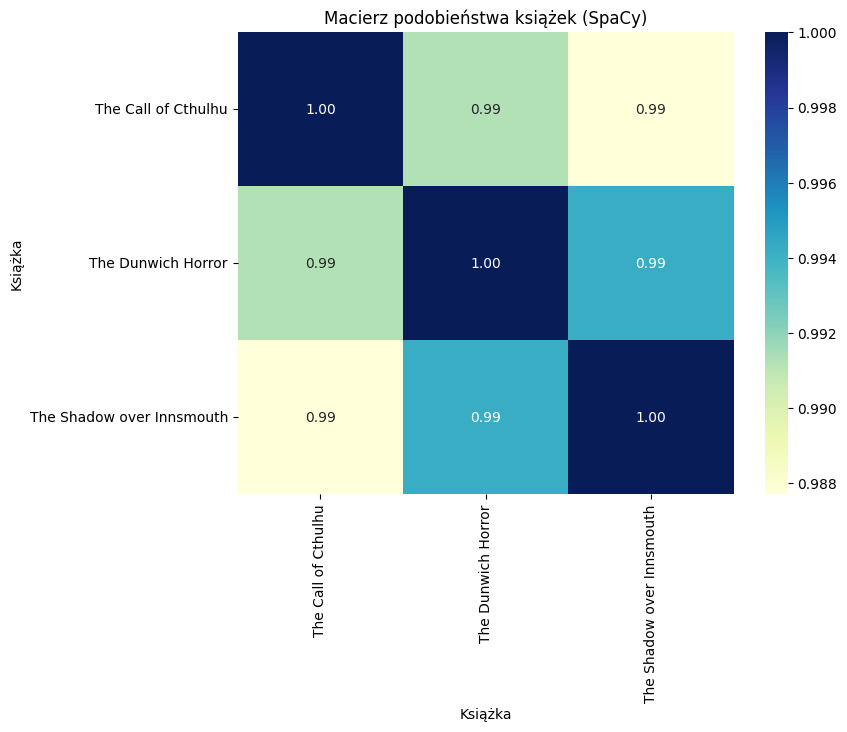

In [ ]:
# Połączenie tekstów książek w jeden ciąg znaków
def scal_ksiazke(chapters_dict):
    return ' '.join(chapters_dict.values())

# Tworzenie korpusu książek
books_combined = {
    "The Call of Cthulhu": scal_ksiazke(chapters_The_Call_of_Cthulu),
    "The Dunwich Horror": scal_ksiazke(chapters_The_Dunwich_Horror),
    "The Shadow over Innsmouth": scal_ksiazke(chapters_The_Shadow_over_Innsmouth)
}

# Przetwarzanie tekstu książek
processed_books = {title: ' '.join(preprocess_text(text)) for title, text in books_combined.items()}

# Tworzenie dokumentu spaCy
book_docs = {title: nlp(text) for title, text in processed_books.items()}

# Obliczanie macierzy podobieństwa
book_titles = list(book_docs.keys())
n_books = len(book_titles)
sim_matrix_books = np.zeros((n_books, n_books))

for i in range(n_books):
    for j in range(n_books):
        sim_matrix_books[i, j] = book_docs[book_titles[i]].similarity(book_docs[book_titles[j]])

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix_books, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=book_titles, yticklabels=book_titles)
plt.title("Macierz podobieństwa książek (SpaCy)")
plt.xlabel("Książka")
plt.ylabel("Książka")
plt.show()

Również pomiędzy książkami nie udało się znaleźć za pomocą tej metody wyraźnych różnic.

# Reprezaentacja TFIDF
Ten fragment kodu definiuje funkcję `tfidf_sim_matrix`, która oblicza macierz podobieństwa między dokumentami (np. książkami lub rozdziałami) na podstawie reprezentacji TF-IDF. Najpierw tworzony jest wektor TF-IDF z tekstów wejściowych z uwzględnieniem filtrów: `min_df=2` usuwa słowa występujące tylko raz (redukcja szumu), a `max_df=0.9` eliminuje bardzo częste słowa, które mogą nie wnosić informacji (np. ogólne terminy). Następnie za pomocą funkcji `cosine_similarity` wyliczana jest macierz podobieństwa cosinusowego pomiędzy dokumentami. Tak powstała macierz może służyć do porównań podobieństwa tekstów, jako alternatywa dla podejścia opartego na embeddingach spaCy.

In [ ]:
# Macierz tfidf do porównania z spacy
def tfidf_sim_matrix(docs_texts):
    vectorizer = TfidfVectorizer(min_df=2, max_df=0.9)
    X = vectorizer.fit_transform(docs_texts)
    sim_matrix = cosine_similarity(X)
    return sim_matrix

Ten fragment kodu przygotowuje dane i oblicza macierze podobieństwa pomiędzy rozdziałami (oraz pomiędzy całymi książkami) w oparciu o reprezentację TF-IDF. Najpierw dla każdej książki tworzona jest lista dokumentów tekstowych, w których tokeny po przetworzeniu są łączone w ciągi znaków. Następnie funkcja `tfidf_sim_matrix` jest używana do wygenerowania macierzy podobieństw cosinusowych osobno dla każdej książki, porównując między sobą jej rozdziały. Dodatkowo obliczana jest również macierz podobieństwa między całymi książkami, bazując na ich pełnych tekstach. Na końcu każda z tych macierzy jest wizualizowana za pomocą map ciepła (`heatmap`), co pozwala ocenić wewnętrzne i międzyksiążkowe podobieństwa semantyczne na podstawie częstości i znaczenia terminów.

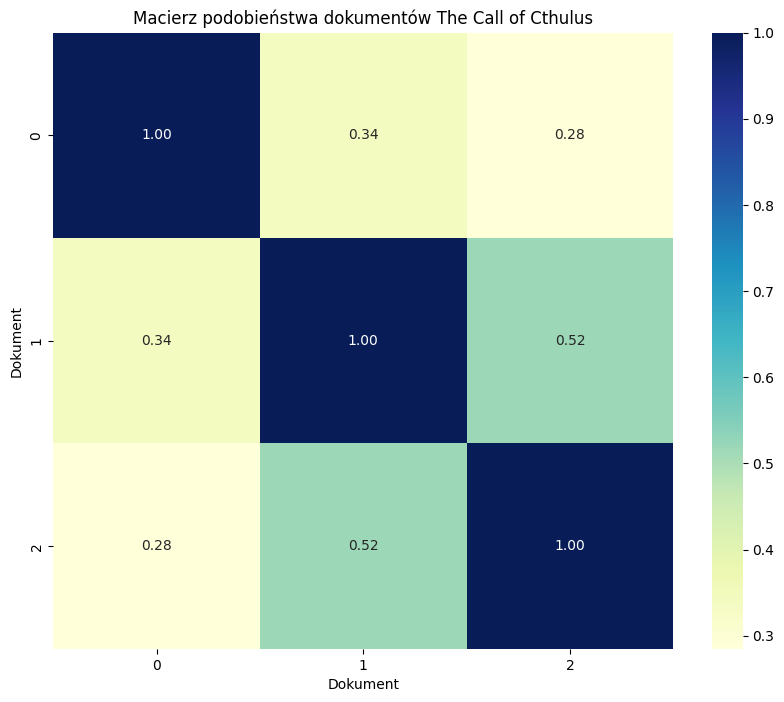

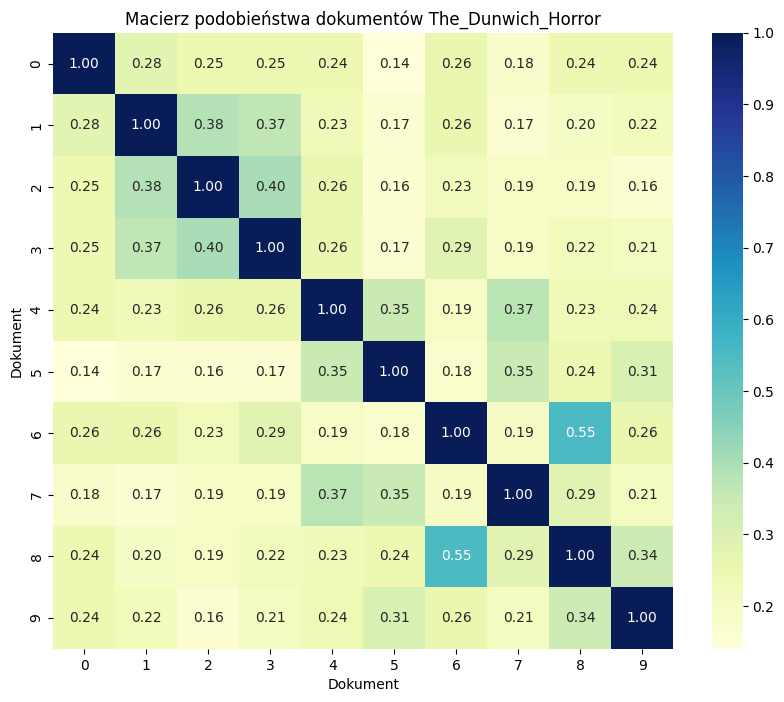

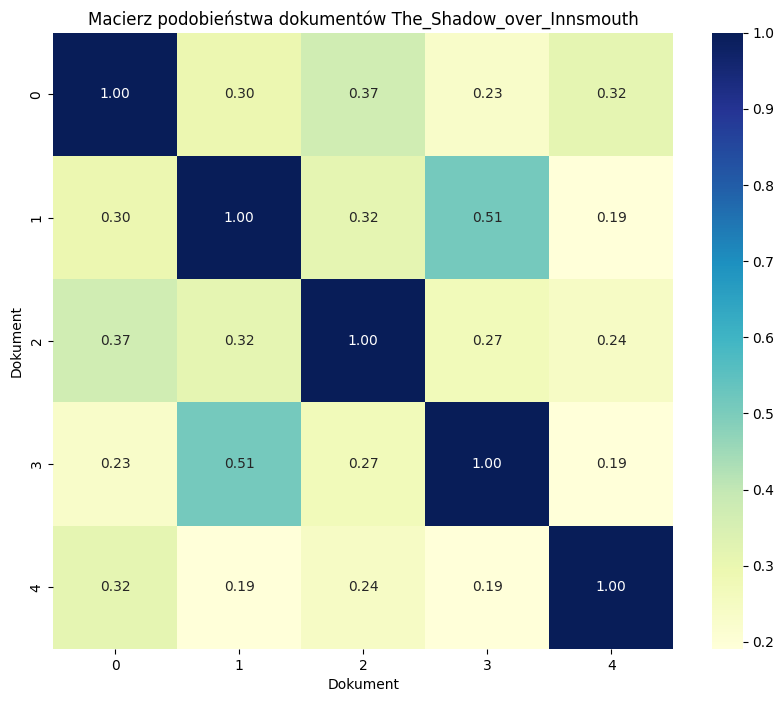

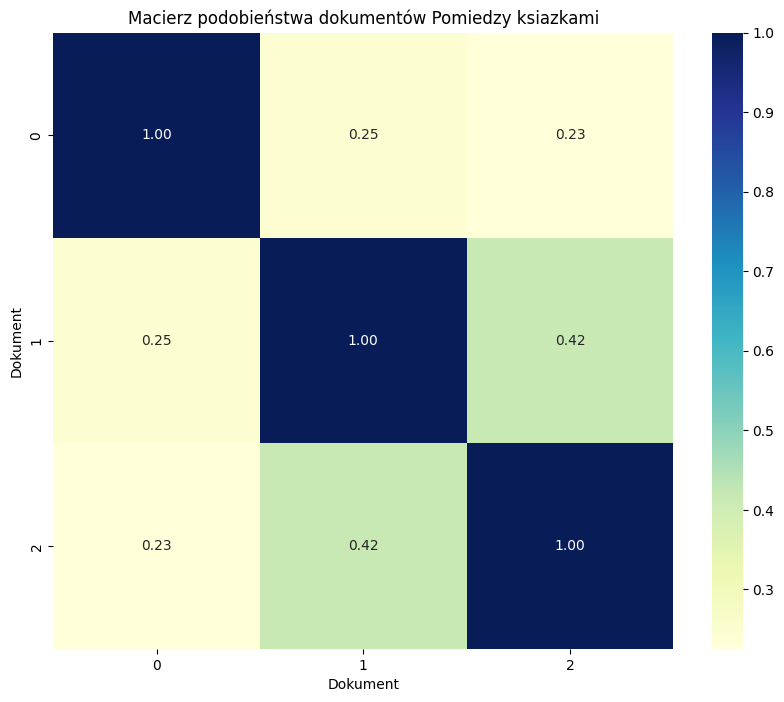

In [ ]:
# Przygotowanie listy tokenow
korpus_Cthulu = [" ".join(tokens) for tokens in processed_The_Call_of_Cthulu.values()]
korpus_Dunwich = [" ".join(tokens) for tokens in processed_The_Dunwich_Horror.values()]
korpus_Innsmouth = [" ".join(tokens) for tokens in processed_The_Shadow_over_Innsmouth.values()]

# Obliczenie macierzy podobieństw z tdidf
sim_matrix_tfidf_Cthulu = tfidf_sim_matrix(korpus_Cthulu)
sim_matrix_tfidf_Dunwich = tfidf_sim_matrix(korpus_Dunwich)
sim_matrix_tfidf_Innsmouth = tfidf_sim_matrix(korpus_Innsmouth)
sim_matrix_tfidf_all = tfidf_sim_matrix(processed_books.values())

rysuj_heatmap(sim_matrix_tfidf_Cthulu, "The Call of Cthulus")
rysuj_heatmap(sim_matrix_tfidf_Dunwich, "The_Dunwich_Horror")
rysuj_heatmap(sim_matrix_tfidf_Innsmouth, "The_Shadow_over_Innsmouth")
rysuj_heatmap(sim_matrix_tfidf_all, "Pomiedzy ksiazkami")

Za pomocą reprezentacji TFIDF udało się uchwycić wyraźne różnice pomiędzy rodziałami w każdej książce oraz między książkami. Ta analiza zostanie później potwierdzona podczas grupowania gdzie lepsze wyniki uzyskane zostaną z użyciem reprezentacji tfidf a także podczas klasyfikacji paragrafów gdzie reprezentacja Word2Vec uzyska zauważalnie gorsze wyniki.

# Analiza termów

Ten fragment kodu definiuje funkcję flatten_tokens, której celem jest spłaszczenie listy tokenów znajdujących się w rozdziałach przetworzonej książki. Funkcja przyjmuje słownik, w którym kluczami są nazwy lub numery rozdziałów, a wartościami — listy tokenów (np. po lematyzacji i oczyszczeniu tekstu). Zwraca jedną, wspólną listę wszystkich tokenów z całej książki. Funkcja ta jest przydatna do dalszej analizy całych tekstów książek, takich jak tworzenie chmur słów, analiza częstości występowania słów, czy analiza emocji.

In [ ]:
# Funkcja do łączenia tokenów z rozdziałów w jedną listę słów
def flatten_tokens(processed_book):
    return [token for chapter in processed_book.values() for token in chapter]

Ten fragment kodu wykonuje analizę częstości występowania słów (termów) w każdej z trzech książek Lovecrafta. Najpierw za pomocą funkcji flatten_tokens tworzone są listy wszystkich tokenów (czyli oczyszczonych i przetworzonych słów) dla każdej książki z osobna. Następnie z użyciem klasy Counter z biblioteki collections obliczana jest liczba wystąpień każdego słowa w każdej książce. Powstałe słowniki liczba_wystapien_cthulu, liczba_wystapien_dunwich i liczba_wystapien_innsmouth mogą być używane do tworzenia chmur słów, analizy terminów wspólnych i charakterystycznych, czy dalszego filtrowania nieistotnych słów.

In [ ]:
# Tworzymy listy słów
words_cthulhu = flatten_tokens(processed_The_Call_of_Cthulu)
words_dunwich = flatten_tokens(processed_The_Dunwich_Horror)
words_innsmouth = flatten_tokens(processed_The_Shadow_over_Innsmouth)

# Liczba wystąpień termów
liczba_wystapien_cthulu = Counter(words_cthulhu)
liczba_wystapien_dunwich = Counter(words_dunwich)
liczba_wystapien_innsmouth = Counter(words_innsmouth)

In [ ]:
liczba_wystapien_cthulu.most_common(15)

[('dream', 48),
 ('cult', 38),
 ('old', 35),
 ('professor', 32),
 ('great', 32),
 ('thing', 29),
 ('find', 28),
 ('johansen', 27),
 ('uncle', 26),
 ('wilcox', 24),
 ('cthulhu', 23),
 ('legrasse', 22),
 ('stone', 22),
 ('time', 21),
 ('note', 20)]

In [ ]:
liczba_wystapien_dunwich.most_common(15)

[('whateley', 91),
 ('hill', 57),
 ('old', 54),
 ('armitage', 52),
 ('wilbur', 48),
 ('thing', 42),
 ('dunwich', 37),
 ('great', 36),
 ('time', 34),
 ('think', 30),
 ('place', 29),
 ('glen', 28),
 ('night', 27),
 ('horror', 26),
 ('find', 25)]

In [ ]:
liczba_wystapien_innsmouth.most_common(15)

[('thing', 60),
 ('innsmouth', 57),
 ('street', 53),
 ('old', 52),
 ('begin', 39),
 ('door', 37),
 ('time', 33),
 ('kind', 33),
 ('marsh', 29),
 ('folk', 29),
 ('town', 28),
 ('water', 28),
 ('hear', 26),
 ('sea', 25),
 ('get', 24)]

Do analizy tekstów literackich H.P. Lovecrafta dodano rozszerzony zestaw słów stop (ang. stopwords), zawarty w zmiennej my_stopwords, ponieważ zawarte tam wyrazy – mimo że nie występują na standardowych listach stopwords języka angielskiego – w kontekście tego konkretnego zadania nie wnoszą istotnych informacji semantycznych i nie wpływają znacząco na odróżnianie tematów, stylu ani treści książek.

Słowa takie jak "one", "man", "come", "say", "know", "see", "look", "go", "like" czy "tell" są bardzo ogólne i uniwersalne — pojawiają się w niemal każdym rodzaju narracji i nie niosą unikalnych cech stylistycznych ani tematycznych. Ich częste występowanie mogłoby zaciemniać wyniki analizy, np. w chmurach słów, modelach tematycznych LDA, analizie TF-IDF czy klasyfikacji.

Z kolei słowa takie jak "state", "mean" czy "set" są wieloznaczne i często pełnią funkcje pomocnicze w zdaniach, nie wnosząc jednoznacznej wartości analitycznej. Wyrazy typu "ba", "obe", "aout" mogą być pozostałościami błędnego wczytywania lub przetwarzania tekstu (literówki, przekłamania OCR) i również nie mają wartości analitycznej możliwe jest również że stanowią część języka stworzonego przez Lovecrafta, którym posługują się ludzie do porozumiewania się z istotami przez niego wykreowanymi.

Podsumowując, decyzja o dodaniu tych słów do listy stopwords została podjęta w celu oczyszczenia analizy ze zbędnych elementów językowych, które mogłyby zaburzyć dokładność interpretacji, analizy tematycznej i klasyfikacji. Umożliwia to wyeksponowanie bardziej znaczących terminów charakterystycznych dla poszczególnych książek i stylu autora.

    my_stopwords = {"new", "state", "mean", "ba", "set", "one", "man", "tell", "come", "like", "know", "see", "say", "look", "obe", "aout", "go", "open"} #dodatkowe stopwords

# Chmury słów

Kod tworzy zbiory unikalnych słów dla trzech tekstów, definiuje funkcję wyświetlającą chmurę słów, a następnie generuje chmury dla słów wspólnych oraz unikatowych dla każdej pary i każdego z tekstów osobno, pokazując ich częstości występowania.


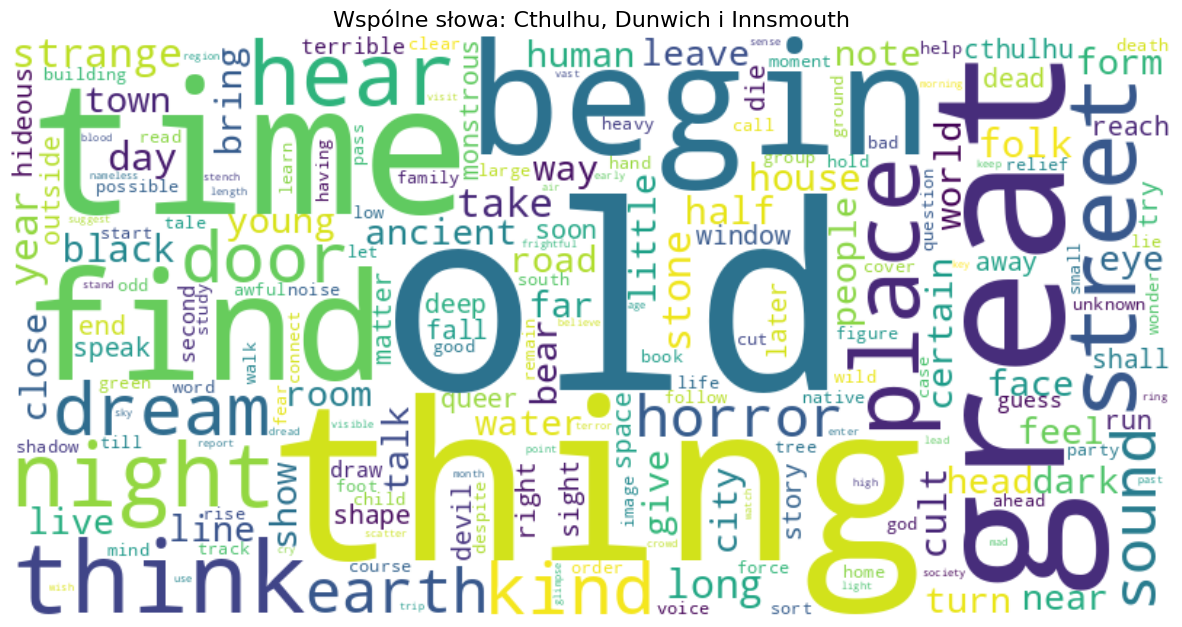

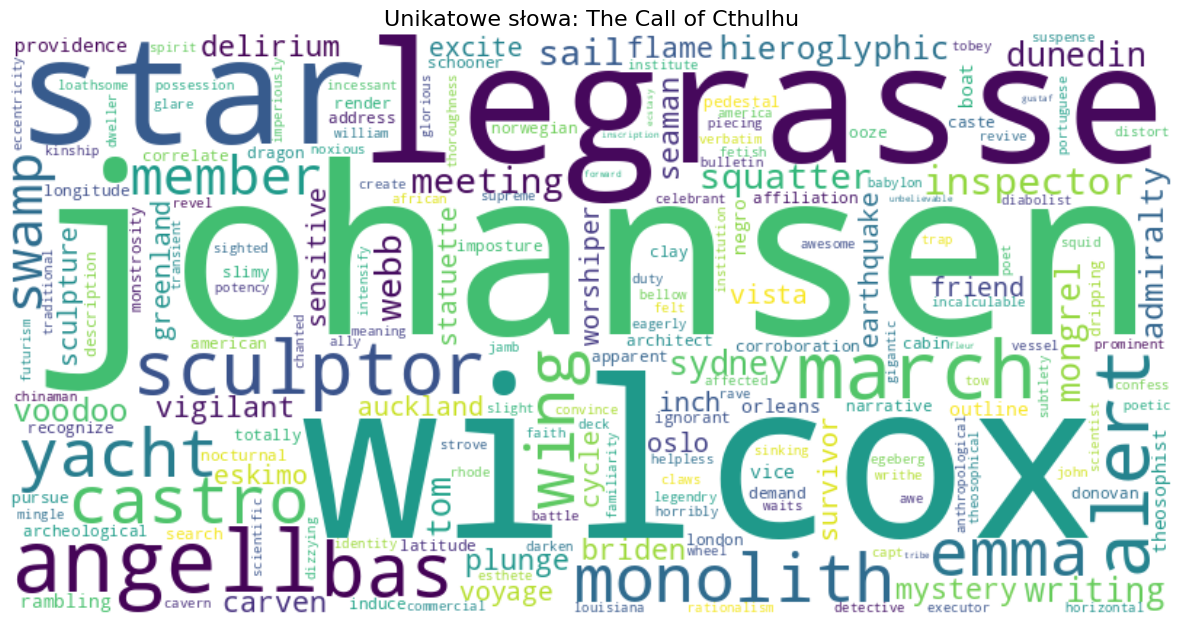

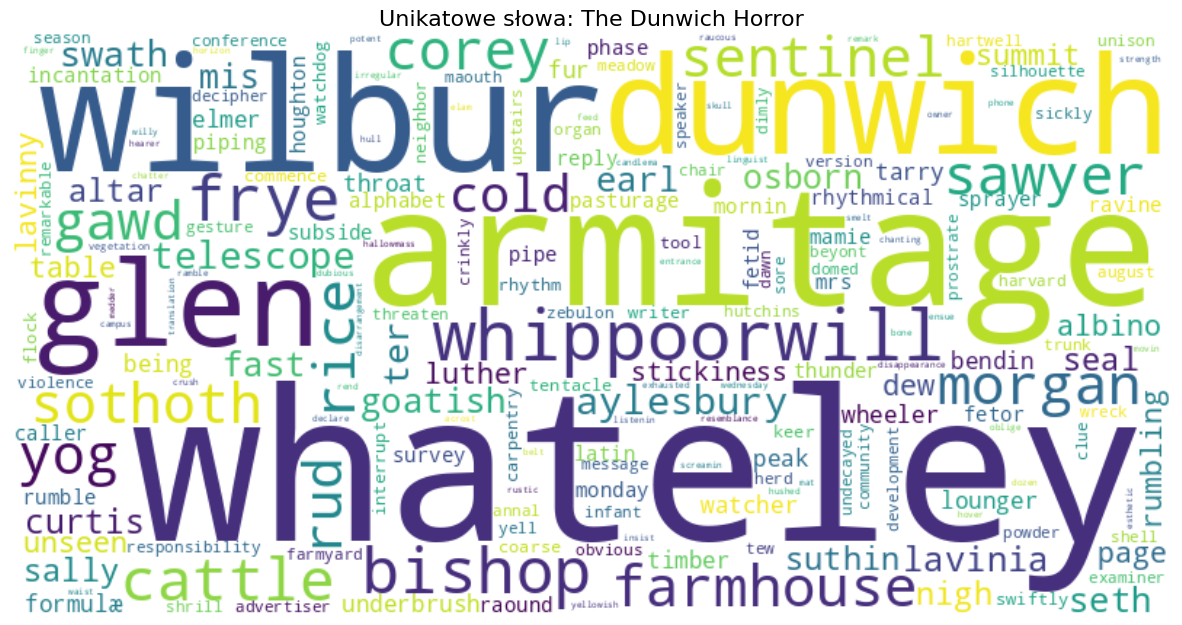

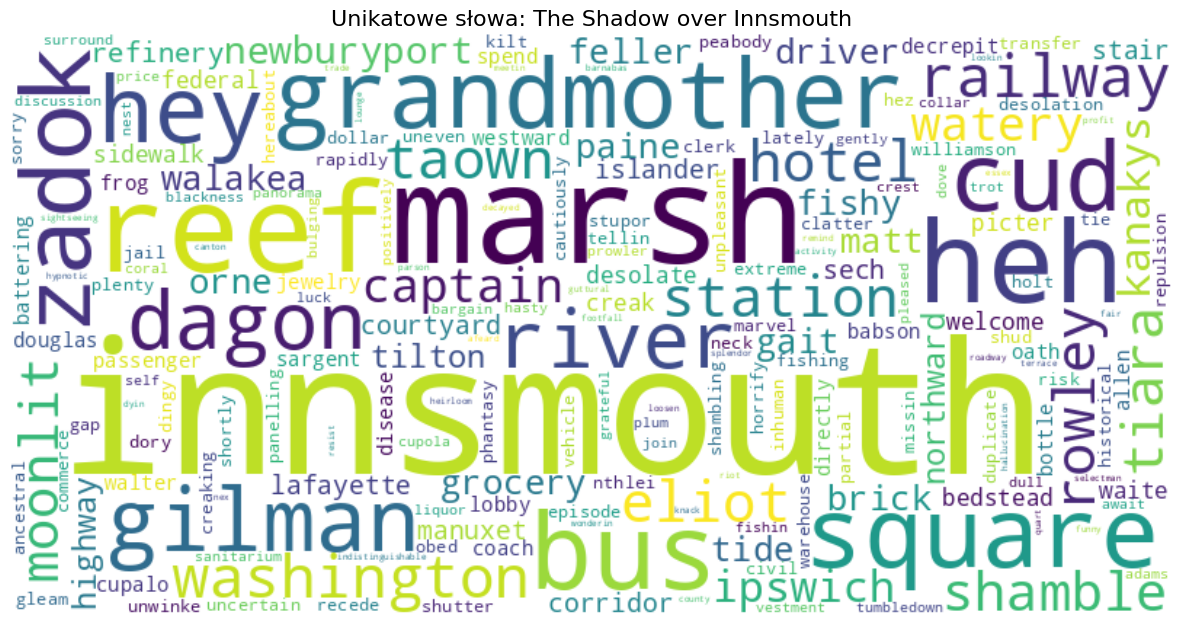

In [ ]:
# Tworzenie zbioru słów
set_cthulhu = set(words_cthulhu)
set_dunwich = set(words_dunwich)
set_innsmouth = set(words_innsmouth)

# Chmura słów – funkcja pomocnicza
def show_wordcloud(word_list, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_list)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()

# --- Wspólne słowa ---
common_all = set_cthulhu & set_dunwich & set_innsmouth
freq_common_all = {
    word: liczba_wystapien_cthulu[word] + liczba_wystapien_dunwich[word] + liczba_wystapien_innsmouth[word]
    for word in common_all
}
show_wordcloud(freq_common_all, "Wspólne słowa: Cthulhu, Dunwich i Innsmouth")

# --- Unikatowe słowa ---
unique_cthulhu = set_cthulhu - (set_dunwich | set_innsmouth)
freq_unique_cthulhu = {
    word: liczba_wystapien_cthulu[word]
    for word in unique_cthulhu
}
unique_dunwich = set_dunwich - (set_cthulhu | set_innsmouth)
freq_unique_dunwich = {
    word: liczba_wystapien_dunwich[word]
    for word in unique_dunwich
}
unique_innsmouth = set_innsmouth - (set_cthulhu | set_dunwich)
freq_unique_innsmouth  = {
    word: liczba_wystapien_innsmouth[word]
    for word in unique_innsmouth
}

show_wordcloud(freq_unique_cthulhu, "Unikatowe słowa: The Call of Cthulhu")
show_wordcloud(freq_unique_dunwich, "Unikatowe słowa: The Dunwich Horror")
show_wordcloud(freq_unique_innsmouth, "Unikatowe słowa: The Shadow over Innsmouth")

# Analiza Chmur słów

Wspólne słowa: Cthulhu, Dunwich i Innsmouth
Chmura przedstawia najczęściej powtarzające się słowa we wszystkich trzech opowiadaniach Lovecrafta. Pokazuje, co łączy „The Call of Cthulhu”, „The Dunwich Horror” i „The Shadow over Innsmouth” na poziomie języka i motywów.
Narracja odkrywania tajemnicy:
Czasowniki takie jak find, begin, hear, think, see, dream, talk, note, face odzwierciedlają drogę bohatera w głąb tajemnicy. Narrator nie wie wszystkiego – jego wiedza budowana jest stopniowo, przez słuchanie, czytanie, śledzenie znaków.
Przestrzeń jako element grozy:
Słowa place, house, street, room, stone, hill, city, outside wskazują na znaczenie przestrzeni – często zamkniętej, klaustrofobicznej lub przesiąkniętej starożytnością. Lovecraft buduje lęk także poprzez scenerię.
Czas i starożytność:
Wyrazy old, ancient, year, time, later, night, day pokazują kontrast między teraźniejszością a przeszłością. Kluczowym motywem jest powrót przeszłości, która miała pozostać zapomniana.
Groza egzystencjalna:
Częste słowa to horror, thing, fear, dark, dead, hideous, monstrous, dread, terror, unknown. Opisy Lovecrafta są zdominowane przez niewyrażalne zagrożenie, które budzi nie tyle strach, co egzystencjalny lęk.
Mitologia i kulty:
Słowa cult, god, form, figure, folk, voice, world, human sugerują zderzenie człowieka z nieludzkimi siłami. Lovecraft kreuje świat, w którym ludzkość nie jest centrum wszechświata – a raczej ofiarą kosmicznych bytów.
Ciało, zmysły, przemiana:
Pojawiają się słowa jak eye, face, head, voice, form, shape, shadow, sound, figure – wskazujące na cielesność doświadczenia grozy.
Ruch i akcja:
Czasowniki leave, take, run, fall, turn, walk, start, pass, follow wprowadzają dynamikę. Narracje Lovecrafta często mają formę podróży – bohater przemieszcza się fizycznie i metaforycznie w stronę wiedzy (i zagłady).
Znaczenie słowa i zapisu:
Słowa note, story, book, word, report, tale wskazują, że informacje o świecie przedstawionym bywa przekazywana przez teksty i opowieści.
Podsumowanie:
Wspólne słowa ukazują trzon stylu Lovecrafta: ontologiczny lęk, starożytną mitologię, powolne odkrywanie prawdy oraz przenikanie rzeczywistości przez coś niewyrażalnego. Choć każde z opowiadań ma odrębną fabułę, to łączy je język opisu nieznanego, formy narracyjne i pesymizm.



#Unikatowe słowa: The Call of Cthulhu

Chmura słów zawiera terminy, które pojawiają się wyłącznie w opowiadaniu „The Call of Cthulhu”, a nie występują w „The Dunwich Horror” ani „The Shadow over Innsmouth”.
Postacie i lokalizacje globalne:
Nazwiska takie jak Legrasse, Wilcox, Johansen, Castro, Angell, a także miejsca: Auckland, Oslo, Greenland, Dunedin, Sydney, Swamp – wskazują na szeroką skalę wydarzeń i zróżnicowaną geografię. Fabuła oparta jest na gromadzeniu relacji świadków z różnych części świata.
Motywy morskie i eksploracyjne:
Wyrazy yacht, voyage, admiralty, seaman, iceberg, nautical, ship, sail, survivor wskazują na obecność tematyki podróży morskiej i odkrycia zatopionego miasta. Ocean symbolizuje tutaj niepoznane – przestrzeń, z której wyłania się pradawna groza.
Kult i rytuał:
Pojawiają się słowa takie jak voodoo, idol, cult, hieroglyphic, statue, statuette, carven, clay, sculptor, inscription, monolith – wszystkie związane z materialnymi śladami działalności czcicieli Cthulhu. Elementy te sugerują istnienie zorganizowanego, globalnego kultu i jego rytualnych artefaktów.
Inność i kolonialna egzotyka:
Obecność słów jak eskimo, negro, mongrel, chinaman, tribe, african, american ukazuje sposób, w jaki Lovecraft przedstawiał „Innych” – jako nosicieli starożytnej wiedzy, często w sposób nacechowany kolonialnymi stereotypami.
Groza wewnętrzna i psychiczna:
Słowa delirium, obsession, fearfully, clammy, ooze, vice, horribly, diabolist, monstrosity wskazują na horror o charakterze psychologicznym i egzystencjalnym. Bohaterowie często balansują na krawędzi obłędu wskutek zetknięcia z niepojętą prawdą.
Forma śledcza i dokumentalna:
Terminy takie jak report, outline, narrative, writing, executor, address, bulletin, meeting podkreślają quasi-dziennikarski charakter narracji. Cała opowieść ma strukturę rekonstrukcji zdarzeń na podstawie dokumentów i relacji.
Podsumowanie:
„The Call of Cthulhu” wyróżnia się globalną skalą, narracją opartą na dokumentach oraz centralnym motywem kultu pradawnego bóstwa, które mimo snu na dnie oceanu wciąż wpływa na ludzi. Unikatowe słowa w chmurze uwypuklają rozległość geograficzną, elementy morskie, rytuały kultowe oraz psychologiczne napięcie, które odróżniają to opowiadanie od pozostałych.

# Unikatowe słowa The Dunwich Horror

Chmura słów: „Unikatowe słowa: The Dunwich Horror”
Chmura słów przedstawia wyrazy, które pojawiają się wyłącznie w opowiadaniu „The Dunwich Horror” H.P. Lovecrafta, a nie występują w „The Shadow over Innsmouth” ani „The Call of Cthulhu”.
Postacie i nazwiska lokalne:
Największe słowa to m.in. Whateley, Wilbur, Armitage, Lavinia, Bishop, Curtis, Frye, Morgan, Osborn – to mieszkańcy Dunwich i osoby związane z głównym wątkiem fabularnym. Wskazuje to na silne osadzenie opowiadania w małej, odizolowanej społeczności wiejskiej.
Topografia i wiejskie otoczenie:
Słowa takie jak Dunwich, farmhouse, glen, ravine, cattle, pasturage, underbrush, swath, farmyard wskazują na rustykalne, górskie otoczenie akcji. Przestrzeń ta ma charakter zamknięty, pełen zarośli, wzgórz i odizolowanych gospodarstw.
Motywy okultystyczne i nadprzyrodzone:
Wyrazy Yog, Sothoth, incantation, altar, formulae, interrupter, undergraduate, Harvard, telescope wskazują na obecność zakazanej wiedzy, rytuałów i nauki jako narzędzi do walki z nadprzyrodzonym.
Atmosfera grozy i dezintegracji:
Pojawiają się słowa takie jak goatish, thunder, stickiness, unseen, fetor, piping, prostrate, violence, które budują nastrój tajemnicy, przemocy i cielesnej degeneracji.
Zwierzęta i natura jako zwiastuny zagrożenia:
Obecność słów whippoorwill, cattle, podkreśla rolę przyrody w narracji – zwierzęta wyczuwają zagrożenie, stają się jego ofiarami lub świadkami.
Podsumowanie:
„The Dunwich Horror” to opowieść silnie osadzona w górskim, wiejskim krajobrazie, pełna symboliki degeneracji, okultystycznych praktyk i zderzenia wiedzy akademickiej z niewypowiedzianym horrorem. Unikatowe słowa tej chmury podkreślają lokalność, pokoleniowe tajemnice i nie-ludzką obecność, która czai się w ukryciu.


# Unikatowe słowa The Shadow over Innsmouth

Chmura słów: „Unikatowe słowa: The Shadow over Innsmouth”
Chmura słów zawiera terminy charakterystyczne tylko dla opowiadania „The Shadow over Innsmouth” i nieobecne w „The Dunwich Horror” oraz „The Call of Cthulhu”.
Miejsce akcji i geografia miejska:
Dominują słowa Innsmouth, square, station, railway, bus, hotel, refinery, grocery, courtyard, które wskazują na zrujnowane, nadmorskie miasteczko. Miasto jest jednocześnie przestrzenią fizyczną i metaforyczną – zamkniętą, zdegenerowaną enklawą.
Postacie i lokalna społeczność:
Imiona i nazwiska jak Zadok, Gilman, Howley, Grandmother, Hey, Feller, Eliot, Cud budują obraz zamkniętej, podejrzanej społeczności z własną historią i dziwactwami. Postać Zadoka Allena jest szczególnie ważna jako nośnik ukrytej wiedzy.
Motywy morskie i rybo-ludzkie:
Pojawiają się słowa reef, dagon, watery, river, moonlit, fishy, tide, frogs, shamble – wskazujące na obecność istot z głębin i ich wpływ na ludzi. Te elementy są centralne dla grozy opowiadania – stopniowej przemiany mieszkańców w hybrydy.
Atmosfera degeneracji i obcości:
Wyrazy takie jak decrepit, desolate, disease, repulsion, brick, tumbledown podkreślają zniszczenie, zaniedbanie i moralną pustkę miasta. To miejsce zapomniane przez świat i zawładnięte przez nieludzkie siły.
Podróż i odkrywanie tajemnicy:
Słowa driver, bus, railway, station, highway, refinery, transfer, welcome ukazują, że fabuła rozgrywa się jako podróż – dosłowna i metaforyczna – w głąb ukrytej prawdy o Innsmouth i jego mieszkańcach.
Podsumowanie:
„The Shadow over Innsmouth” to historia osadzona w zrujnowanym, odizolowanym mieście, gdzie morskie bóstwa i ich potomkowie dominują nad upadłą społecznością. Unikatowe słowa podkreślają motyw degeneracji, izolacji oraz wypieranej wiedzy o przerażającym dziedzictwie. W przeciwieństwie do bardziej rozproszonych i globalnych narracji Lovecrafta, „Innsmouth” jest zamkniętym mikrokosmosem grozy.


# Grupowanie

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def analiza_metoda_lokcia(data_matrix, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data_matrix)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title('Metoda łokcia (Elbow Method)')
    plt.xlabel('Liczba klastrów (k)')
    plt.ylabel('WCSS (within-cluster sum of squares)')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.show()

Funkcja klasteryzuj_kmeans wykonuje klasteryzację dokumentów za pomocą algorytmu KMeans na wektorach reprezentujących dokumenty (pobranych z modelu spaCy). Na końcu wypisuje, do którego klastra przypisano każdy dokument, i zwraca etykiety klastrów oraz wektory dokumentów.

In [ ]:
from sklearn.metrics import silhouette_score
#funkcja do klasteryzacji dokumentów spacy
def klasteryzuj_kmeans(docs, n_clusters=5, true_labels=None):
    # Wyciągnięcie wektorów dokumentów
    docs_vec = [doc.vector for doc in docs]

    # Klasteryzacja KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(docs_vec)

    # Wyświetlenie przypisań dokumentów do klastrów
    print("\n--- Przypisanie dokumentów do klastrów ---")
    for i, label in enumerate(labels):
        real_label = true_labels[i] if true_labels else "brak"
        print(f"Dokument {i}: klaster {label}, książka: {real_label}")

     # Obliczenie i wyświetlenie Silhouette Score
    sil_score = silhouette_score(docs_vec, labels)
    print(f"\nSilhouette Score: {sil_score:.4f}")

    return labels, docs_vec

Kod łączy dokumenty z trzech tekstów w jedną listę, tworzy listę etykiet odpowiadającą źródłowym tekstom każdego dokumentu, a następnie wykonuje klasteryzację KMeans na tych dokumentach, przypisując je do trzech klastrów i zwracając przewidywane etykiety oraz wektory dokumentów.

In [ ]:
# łączenie dokumentów i eytkiety dla rozdziałów (spacy)
all_docs_em = docs_Cthulu + docs_Dunwich + docs_Innsmouth
true_labels = (
    ['Cthulhu'] * len(docs_Cthulu) +
    ['Dunwich'] * len(docs_Dunwich) +
    ['Innsmouth'] * len(docs_Innsmouth)
)
docs_vec_all_em = [doc.vector for doc in all_docs_em]

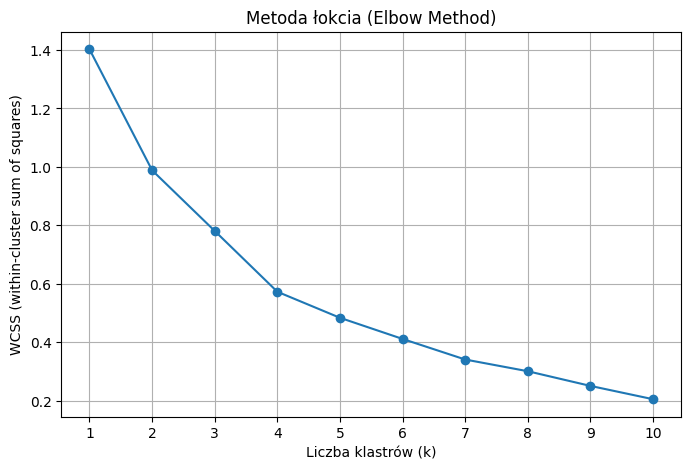

In [ ]:
analiza_metoda_lokcia(docs_vec_all_em, max_k=10)

Na wykresie zgięcie łokcia wydaje się być w okolicach k = 3 lub 4. To tam nachylenie wykresu zaczyna wyraźnie maleć i linia staje się bardziej płaska.

In [ ]:
predicted_labels_em, docs_vec_all_em = klasteryzuj_kmeans(all_docs_em, n_clusters=3, true_labels=true_labels)


--- Przypisanie dokumentów do klastrów ---
Dokument 0: klaster 0, książka: Cthulhu
Dokument 1: klaster 0, książka: Cthulhu
Dokument 2: klaster 0, książka: Cthulhu
Dokument 3: klaster 0, książka: Dunwich
Dokument 4: klaster 0, książka: Dunwich
Dokument 5: klaster 0, książka: Dunwich
Dokument 6: klaster 1, książka: Dunwich
Dokument 7: klaster 1, książka: Dunwich
Dokument 8: klaster 0, książka: Dunwich
Dokument 9: klaster 1, książka: Dunwich
Dokument 10: klaster 0, książka: Dunwich
Dokument 11: klaster 1, książka: Dunwich
Dokument 12: klaster 1, książka: Dunwich
Dokument 13: klaster 2, książka: Innsmouth
Dokument 14: klaster 0, książka: Innsmouth
Dokument 15: klaster 1, książka: Innsmouth
Dokument 16: klaster 2, książka: Innsmouth
Dokument 17: klaster 2, książka: Innsmouth

Silhouette Score: 0.2089


Funkcja wizualizuj_pca wykonuje redukcję wymiarowości danych dokumentów do 3 głównych składowych za pomocą PCA, a następnie tworzy wykresy punktowe pokazujące rozmieszczenie dokumentów na parach składowych (PC1 vs PC2, PC1 vs PC3, PC2 vs PC3). Każdy punkt jest kolorowany według przypisanego klastra, a dodatkowo podpisany etykietą oryginalną. Dzięki temu wizualizacja pozwala zobaczyć grupowanie dokumentów w przestrzeni zredukowanych wymiarów.

In [ ]:
def wizualizuj_pca(docs_vec, labels, true_labels, n_components=3):
    pca = PCA(n_components=n_components)
    coords = pca.fit_transform(docs_vec)

    plt.figure(figsize=(15, 5))
    palette = sns.color_palette("Dark2", n_colors=len(set(labels)))

    # PC1 vs PC2
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=labels, palette=palette, s=120)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PC1 vs PC2")
    for i in range(len(coords)):
        plt.annotate(true_labels[i], (coords[i,0], coords[i,1]), fontsize=9, fontweight="bold")

    # PC1 vs PC3
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=coords[:,0], y=coords[:,2], hue=labels, palette=palette, s=120, legend=False)
    plt.xlabel("PC1")
    plt.ylabel("PC3")
    plt.title("PC1 vs PC3")
    for i in range(len(coords)):
        plt.annotate(true_labels[i], (coords[i,0], coords[i,2]), fontsize=9, fontweight="bold")

    # PC2 vs PC3
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=coords[:,1], y=coords[:,2], hue=labels, palette=palette, s=120, legend=False)
    plt.xlabel("PC2")
    plt.ylabel("PC3")
    plt.title("PC2 vs PC3")
    for i in range(len(coords)):
        plt.annotate(true_labels[i], (coords[i,1], coords[i,2]), fontsize=9, fontweight="bold")

    plt.suptitle(f"Wizualizacja dokumentów po PCA ({n_components} składowe), kolory = klaster", fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

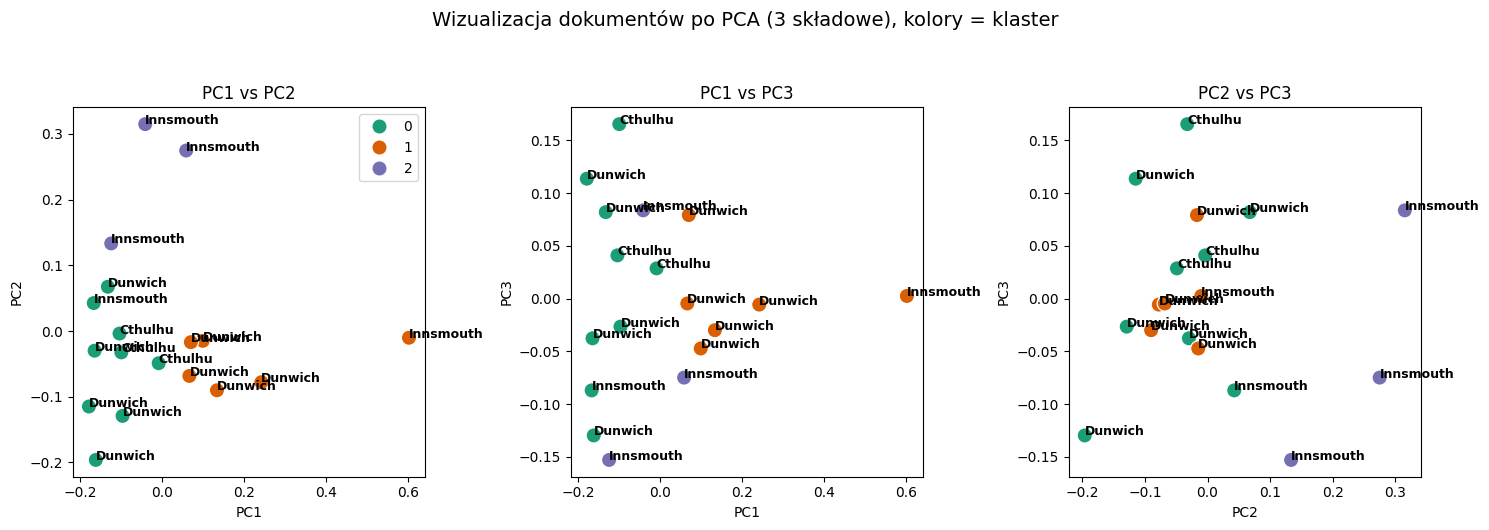

In [ ]:
wizualizuj_pca(docs_vec_all_em, predicted_labels_em, true_labels)

# Analiza grupowania na wektorach dokumentów ze spacy

Analiza wyników klasteryzacji dokumentów przy użyciu algorytmu **KMeans** na podstawie wektorów uzyskanych z modelu **spaCy** wskazuje na pewien poziom struktury w danych, ale także istotne trudności w precyzyjnym oddzieleniu książek.

**1. Klaster 0 (dominujący):**
Ten klaster zawiera aż 10 dokumentów, z czego:

* 3 pochodzą z książki **Cthulhu** (wszystkie rozdziały tej książki),
* 6 z książki **Dunwich**,
* 1 z książki **Innsmouth**.

Oznacza to, że dokumenty z **The Call of Cthulhu** zostały całkowicie zgrupowane razem, co sugeruje ich względną spójność stylistyczno-semantyczną według reprezentacji spaCy. Jednak duża część rozdziałów z **The Dunwich Horror** również trafiła do tego klastra – wskazuje to na znaczące podobieństwo między tymi dwoma książkami w ujęciu wektorowym.

**2. Klaster 1 (mieszany):**
Zawiera 5 dokumentów:

* 4 z książki **Dunwich**,
* 1 z książki **Innsmouth**.

Ten klaster zbiera pozostałe rozdziały z **The Dunwich Horror**, które najprawdopodobniej różniły się od tych z klastra 0 (np. pod względem tematyki, tonu lub słownictwa). Obecność dokumentu z **Innsmouth** może świadczyć o pewnym pokrewieństwie semantycznym jednego z jej rozdziałów do tej właśnie grupy.

**3. Klaster 2 (głównie Innsmouth):**
Zawiera 3 dokumenty:

* wszystkie pochodzą z **The Shadow over Innsmouth**.

Ten wynik jest częściowo zgodny z oczekiwaniami – część rozdziałów z tej książki tworzy własny, osobny klaster, co świadczy o tym, że mogą one znacząco różnić się od pozostałych książek, prawdopodobnie ze względu na inne słownictwo, tematykę lub ton narracji.

---

### Podsumowanie i wnioski:

1. **Spójność wewnętrzna „Cthulhu”:**
   Wszystkie rozdziały tej książki zostały przypisane do jednego klastra, co sugeruje ich wysoką spójność semantyczną.

2. **Rozproszenie „Dunwich”:**
   Rozdziały z „The Dunwich Horror” są rozdzielone pomiędzy dwa klastry (0 i 1), co wskazuje na większą różnorodność tematyczno-stylistyczną tej książki – jej fragmenty są bardziej zróżnicowane lub pośrednie między pozostałymi dziełami.

3. **Częściowa separacja „Innsmouth”:**
   Książka ta została podzielona między trzy klastry (0, 1 i 2), ale większość jej rozdziałów znalazła się w klastrze 2, co sugeruje, że przynajmniej część książki jest dobrze odróżnialna od innych.

4. **Jakość klasteryzacji:**
   KMeans w tym przypadku częściowo uchwycił strukturę danych – jeden klaster dobrze odpowiada jednej książce („Cthulhu”), inny dominuje w „Innsmouth”, ale „Dunwich” okazuje się trudniejszy do jednoznacznej segmentacji. To może wynikać z większego zróżnicowania rozdziałów tej książki lub pośredniego charakteru jej stylu względem pozostałych.

5.  **Silhouette Score** na poziomie 0.2089 wskazuje, że struktura klastrów jest dość słaba – co oznacza, że granice między klastrami nie są wyraźne, a dokumenty w niektórych przypadkach są bardziej podobne do dokumentów z innych klastrów niż do tych ze swojego własnego. Oznacza to, że wektory dokumentów wygenerowane przez model spaCy nie rozdzielają wystarczająco wyraźnie rozdziałów trzech książek Lovecrafta.

Funkcja klasteryzuj_kmeans_tfidf przekształca listę tekstów na macierz cech TF-IDF, a następnie wykonuje klasteryzację KMeans na tych danych z określoną liczbą klastrów. Po przypisaniu dokumentów do klastrów, funkcja wyświetla, do którego klastra należy każdy dokument, oraz pokazuje najważniejsze (najbardziej charakterystyczne) termy dla każdego klastra. Na koniec zwraca etykiety klastrów i macierz TF-IDF.

In [ ]:
def TFIDF(texts):
  vectorizer = TfidfVectorizer(min_df=1, max_df=0.95)
  tfidf_matrix = vectorizer.fit_transform(all_docs)
  return tfidf_matrix

In [ ]:
def klasteryzuj_kmeans_tfidf(texts, n_clusters=5, n_terms=10, true_labels=None):
    # Zamiana tekstów na macierz TF-IDF
    vectorizer = TfidfVectorizer(min_df=1, max_df=0.95)
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Klasteryzacja KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(tfidf_matrix)

    # Wyświetlenie przypisań dokumentów do klastrów
    print("\n--- Przypisanie dokumentów do klastrów ---")
    for i, label in enumerate(labels):
        real_label = true_labels[i] if true_labels else "brak"
        print(f"Dokument {i}: klaster {label}, książka: {real_label}")

    # Wyświetlanie top termów dla każdego klastra
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()

    print("\n--- Najważniejsze termy dla klastrów ---")
    for i in range(n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :n_terms]]
        print(f"Klaster {i}: {', '.join(top_terms)}")

    # Obliczenie i wyświetlenie Silhouette Score
    sil_score = silhouette_score(tfidf_matrix, labels)
    print(f"\nSilhouette Score: {sil_score:.4f}")

    return labels, tfidf_matrix

Kod łączy dokumenty z trzech korpusów w jedną listę oraz tworzy listę etykiet wskazujących, z którego korpusu pochodzi każdy dokument. Następnie wywołuje funkcję klasteryzacji KMeans na wszystkich dokumentach, próbując pogrupować je w 3 klastry i przypisując każdemu dokumentowi etykietę klastra oraz tworząc reprezentację TF-IDF tych dokumentów.

In [ ]:
# łączenie dokumentów i eytkiety dla rozdziałów
all_docs = korpus_Cthulu + korpus_Dunwich + korpus_Innsmouth
true_labels = (
    ['Cthulhu'] * len(korpus_Cthulu) +
    ['Dunwich'] * len(korpus_Dunwich) +
    ['Innsmouth'] * len(korpus_Innsmouth)
)

In [ ]:
all_docs_tfidf = TFIDF(all_docs)

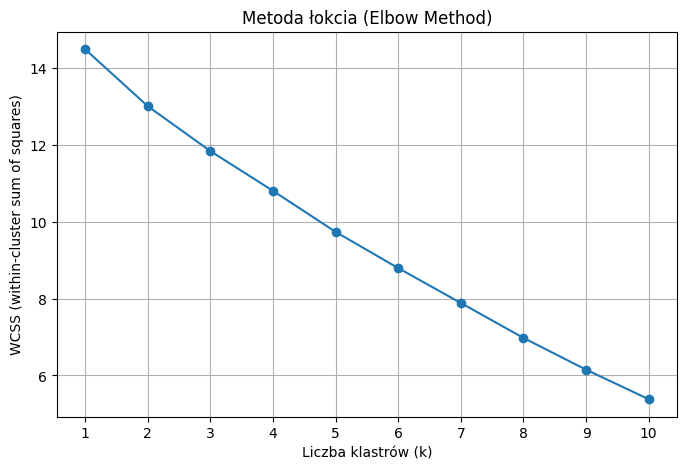

In [ ]:
analiza_metoda_lokcia(all_docs_tfidf, max_k=10)

Na tym nowym wykresie nie widać wyraźnego zgięcia łokcia — krzywa WCSS zmniejsza się dość równomiernie i liniowo w całym zakresie od k=1 do k=10. Brakuje punktu, w którym redukcja WCSS nagle zwalnia, co utrudnia wskazanie optymalnej liczby klastrów na podstawie metody łokcia.

In [ ]:
predicted_labels, docs_vec_all = klasteryzuj_kmeans_tfidf(all_docs, n_clusters=3, true_labels=true_labels)


--- Przypisanie dokumentów do klastrów ---
Dokument 0: klaster 0, książka: Cthulhu
Dokument 1: klaster 0, książka: Cthulhu
Dokument 2: klaster 0, książka: Cthulhu
Dokument 3: klaster 2, książka: Dunwich
Dokument 4: klaster 1, książka: Dunwich
Dokument 5: klaster 1, książka: Dunwich
Dokument 6: klaster 1, książka: Dunwich
Dokument 7: klaster 1, książka: Dunwich
Dokument 8: klaster 1, książka: Dunwich
Dokument 9: klaster 1, książka: Dunwich
Dokument 10: klaster 1, książka: Dunwich
Dokument 11: klaster 1, książka: Dunwich
Dokument 12: klaster 1, książka: Dunwich
Dokument 13: klaster 2, książka: Innsmouth
Dokument 14: klaster 2, książka: Innsmouth
Dokument 15: klaster 2, książka: Innsmouth
Dokument 16: klaster 2, książka: Innsmouth
Dokument 17: klaster 2, książka: Innsmouth

--- Najważniejsze termy dla klastrów ---
Klaster 0: dream, johansen, cult, wilcox, professor, uncle, legrasse, cthulhu, star, angell
Klaster 1: whateley, armitage, wilbur, hill, old, glen, dunwich, thing, whippoorwill

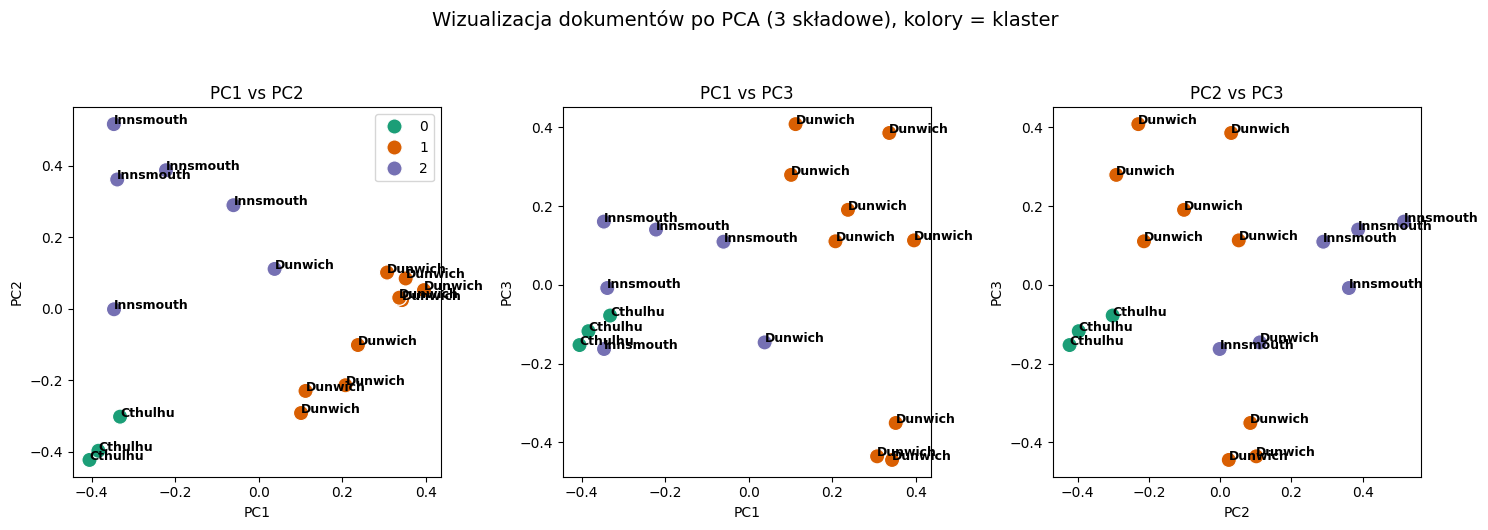

In [ ]:
wizualizuj_pca(docs_vec_all.toarray(), predicted_labels, true_labels)

# Analiza grupowania TFIDF

**1. Przypisania dokumentów do klastrów:**

Analizując przypisania:

Dokumenty 0–2 (Cthulhu) zostały jednoznacznie przypisane do klastra 0, co sugeruje, że teksty z tej książki mają odrębny, rozpoznawalny styl lub słownictwo względem pozostałych.

Dokumenty 3–12 (Dunwich Horror) zostały w większości przypisane do klastra 1, z wyjątkiem dokumentu 3 (klaster 2). To oznacza względną spójność stylu Dunwich, ale obecność dokumentu 3 w klastrze 2 może świadczyć o fragmentarycznym podobieństwie do Innsmouth lub niejednorodności samej książki.

Dokumenty 13–17 (Shadow over Innsmouth) konsekwentnie trafiły do klastra 2, co wskazuje na ich wewnętrzną spójność i odmienność względem pozostałych tekstów.

2. Najważniejsze termy dla każdego klastra:
Analiza słów kluczowych dla klastrów bardzo dobrze koresponduje z treścią książek:

Klaster 0 (Cthulhu): zawiera wyraźnie charakterystyczne słowa jak cthulhu, legrasse, wilcox, johansen, professor, które są ściśle związane z fabułą i postaciami z „The Call of Cthulhu”.

Klaster 1 (Dunwich): dominuje tu słownictwo typowe dla „The Dunwich Horror” – whateley, armitage, wilbur, dunwich, whippoorwill – co dobrze odzwierciedla tematykę tej opowieści.

Klaster 2 (Innsmouth): zawiera terminy takie jak innsmouth, marsh, grandmother, bus, street – jednoznacznie kojarzące się z miejscem akcji i narracją w „The Shadow over Innsmouth”.

**3. Wartość Silhouette Score: 0.0506**

To bardzo niska wartość, wskazująca to na słabe wyodrębnienie klastrów:

Punkty są słabo oddzielone od siebie, a wiele dokumentów znajduje się blisko granic klastrów lub w niejednoznacznym położeniu.

# LDA topic modelling

Ten fragment kodu realizuje analizę tematyczną (topic modeling) na rozdziałach trzech książek H.P. Lovecrafta za pomocą modelu LDA. Najpierw łączy przetworzone teksty wszystkich rozdziałów w jeden korpus i tworzy słownik z tokenami, filtrując rzadkie i zbyt częste słowa. Następnie buduje model LDA z 8 tematami na podstawie tego korpusu.

Dla każdego rozdziału wylicza rozkład tematów (wektor tematów) i na tej podstawie oblicza średni profil tematyczny każdej książki. Pokazuje najważniejsze tematy dla każdej książki, wyświetlając słowa najczęściej reprezentujące te tematy.

Kolejnym krokiem jest klasyfikacja rozdziałów – dla każdego rozdziału oblicza się wektor tematów i porównuje go za pomocą kosinusowej miary podobieństwa do profili książek. Rozdział jest przypisany do książki, której profil jest najbardziej podobny.

Na koniec kod ocenia skuteczność klasyfikacji, pokazując dokładność i macierz pomyłek oraz wyświetla szczegółowe wyniki dla każdego rozdziału z informacją o przypisaniu i podobieństwach do poszczególnych książek.


Tematy charakterystyczne dla książki 'The Call of Cthulhu':
Temat 7: dream, cult, professor, cthulhu, legrasse, city, star, uncle, wilcox, sea
Temat 2: uncle, manuscript, armitage, shall, wilbur, dream, young, case, wilcox, letter
Temat 1: innsmouth, street, door, marsh, town, cross, room, bus, road, window

Tematy charakterystyczne dla książki 'The Dunwich Horror':
Temat 3: glen, frye, wilbur, bishop, armitage, big, corey, boy, tree, rud
Temat 4: armitage, wilbur, yog, sothoth, whippoorwill, window, copy, monstrous, shall, goatish
Temat 2: uncle, manuscript, armitage, shall, wilbur, dream, young, case, wilcox, letter

Tematy charakterystyczne dla książki 'The Shadow over Innsmouth':
Temat 1: innsmouth, street, door, marsh, town, cross, room, bus, road, window
Temat 0: folk, fer, get, water, fish, git, island, abaout, sea, daown
Temat 2: uncle, manuscript, armitage, shall, wilbur, dream, young, case, wilcox, letter

Dokładność klasyfikacji: 100.00%



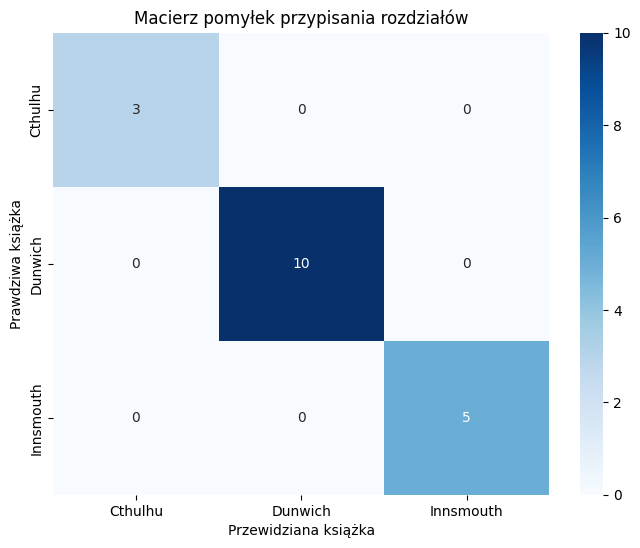


Szczegółowe wyniki przypisania:
1. The Horror in Clay. (Cthulhu) => Cthulhu ✓ (Cthulu: 0.796, Dunwich: 0.312, Insmouth: 0.066)
2. The Tale of Inspector Legrasse. (Cthulhu) => Cthulhu ✓ (Cthulu: 0.977, Dunwich: 0.001, Insmouth: 0.000)
3. The Madness from the Sea. (Cthulhu) => Cthulhu ✓ (Cthulu: 0.977, Dunwich: 0.001, Insmouth: 0.000)
1 (Dunwich) => Dunwich ✓ (Cthulu: 0.001, Dunwich: 0.205, Insmouth: 0.001)
2 (Dunwich) => Dunwich ✓ (Cthulu: 0.001, Dunwich: 0.613, Insmouth: 0.001)
3 (Dunwich) => Dunwich ✓ (Cthulu: 0.215, Dunwich: 0.409, Insmouth: 0.087)
4 (Dunwich) => Dunwich ✓ (Cthulu: 0.001, Dunwich: 0.613, Insmouth: 0.001)
5 (Dunwich) => Dunwich ✓ (Cthulu: 0.001, Dunwich: 0.612, Insmouth: 0.001)
6 (Dunwich) => Dunwich ✓ (Cthulu: 0.001, Dunwich: 0.612, Insmouth: 0.001)
7 (Dunwich) => Dunwich ✓ (Cthulu: 0.000, Dunwich: 0.613, Insmouth: 0.000)
8 (Dunwich) => Dunwich ✓ (Cthulu: 0.215, Dunwich: 0.409, Insmouth: 0.087)
9 (Dunwich) => Dunwich ✓ (Cthulu: 0.000, Dunwich: 0.613, Insmouth: 0.000

In [ ]:
# łączenie termów
all_docs = list(processed_The_Call_of_Cthulu.values()) + \
           list(processed_The_Dunwich_Horror.values()) + \
           list(processed_The_Shadow_over_Innsmouth.values())

# Etykiety prawdziwe dla każdego rozdziału
true_labels = []
chapter_names = []
for bookname, chapters in {
    "Cthulhu": processed_The_Call_of_Cthulu,
    "Dunwich": processed_The_Dunwich_Horror,
    "Innsmouth": processed_The_Shadow_over_Innsmouth
}.items():
    for chapter_name in chapters.keys():
        true_labels.append(bookname)
        chapter_names.append(f"{chapter_name} ({bookname})")

# słownik i korpus
dictionary = corpora.Dictionary(all_docs)
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in all_docs]

# Zbuduj model LDA
num_topics = 8
lda = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=20,
    random_state=42
)

# Przygotowanie danych do wizualizacji
vis_data = gensimvis.prepare(lda, corpus, dictionary)

# Funkcja do uzyskania wektora tematów
def get_topic_vector(bow, lda_model, num_topics):
    topic_dist = lda_model.get_document_topics(bow, minimum_probability=0)
    return np.array([prob for _, prob in sorted(topic_dist, key=lambda x: x[0])])

# Oblicz wektory tematów dla wszystkich rozdziałów z każdej książki
def compute_mean_topic_vector(chapters):
    bows = [dictionary.doc2bow(doc) for doc in chapters.values()]
    topic_vectors = np.array([get_topic_vector(bow, lda, num_topics) for bow in bows])
    return np.mean(topic_vectors, axis=0)

cthulhu_vec = compute_mean_topic_vector(processed_The_Call_of_Cthulu)
dunwich_vec = compute_mean_topic_vector(processed_The_Dunwich_Horror)
innsmouth_vec = compute_mean_topic_vector(processed_The_Shadow_over_Innsmouth)

# Funkcja do wypisywania tematów książek
def print_book_topics(book_name, book_vector, lda_model, num_words=10):
    print(f"\nTematy charakterystyczne dla książki '{book_name}':")
    # najbardziej charakterystyczne tematy dla książki
    top_topics = book_vector.argsort()[::-1][:3]  # Top 3 tematy

    for topic_id in top_topics:
        topic_words = lda_model.show_topic(topic_id, topn=num_words)
        words = [word for word, prob in topic_words]
        print(f"Temat {topic_id}: {', '.join(words)}")

print_book_topics("The Call of Cthulhu", cthulhu_vec, lda)
print_book_topics("The Dunwich Horror", dunwich_vec, lda)
print_book_topics("The Shadow over Innsmouth", innsmouth_vec, lda)

book_profiles = {
    "Cthulhu": cthulhu_vec,
    "Dunwich": dunwich_vec,
    "Innsmouth": innsmouth_vec
}

# Przypisanie rozdziałów do książek na podstawie podobieństwa
def assign_book(chapter_tokens):
    bow = dictionary.doc2bow(chapter_tokens)
    chap_vec = get_topic_vector(bow, lda, num_topics).reshape(1, -1)

    similarities = {
        book: cosine_similarity(chap_vec, vec.reshape(1, -1))[0, 0]
        for book, vec in book_profiles.items()
    }

    assigned_book = max(similarities, key=similarities.get)
    return assigned_book, similarities

# Przypiasanie rozdziałów i wyniki
predicted_labels = []
similarity_details = []

for tokens in all_docs:
    assigned_book, sims = assign_book(tokens)
    predicted_labels.append(assigned_book)
    similarity_details.append(sims)

# Ocena skuteczności
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\nDokładność klasyfikacji: {accuracy:.2%}\n")

# Macierz pomyłek
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=["Cthulhu", "Dunwich", "Innsmouth"])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Cthulhu", "Dunwich", "Innsmouth"],
            yticklabels=["Cthulhu", "Dunwich", "Innsmouth"])
plt.title('Macierz pomyłek przypisania rozdziałów')
plt.xlabel('Przewidziana książka')
plt.ylabel('Prawdziwa książka')
plt.show()

# Wyświetlenie szczegółowych wyników
print("\nSzczegółowe wyniki przypisania:")
for chapter, true, pred, sims in zip(chapter_names, true_labels, predicted_labels, similarity_details):
    correct = "✓" if true == pred else "✗"
    print(f"{chapter} => {pred} {correct} (Cthulu: {sims['Cthulhu']:.3f}, Dunwich: {sims['Dunwich']:.3f}, Insmouth: {sims['Innsmouth']:.3f})")

# Analiza LDA

### 1. Tematy charakterystyczne dla każdej książki

* **The Call of Cthulhu**: Tematy mają silny związek z kluczowymi motywami tej powieści: „dream”, „cult”, „professor”, „cthulhu”, „legrasse”, „city”, „star”. Widać tu odniesienia do snów, kultów, postaci (np. profesor Legrasse), oraz oczywiście samego Cthulhu. Drugi temat zawiera słowa takie jak „uncle”, „manuscript”, „armitage”, co może wskazywać na wątki związane z dokumentami, postaciami i tajemnicami. Trzeci temat skupia się na, „street”, „door” – tutaj widoczna jest pewna przestrzenna lub lokalna narracja.

* **The Dunwich Horror**: Tutaj tematy zawierają imiona i miejsca związane z tą historią: „glen”, „frye”, „wilbur”, „bishop”, „armitage”, „yog”, „sothoth”. Słowa takie jak „monstrous”, „goatish” oraz „whippoorwill” dobrze oddają klimat grozy i mitologii. Temat 2 z „uncle”, „manuscript” i „armitage” pojawia się też w Cthulhu i Innsmouth, co sugeruje pewien wspólny kontekst lub motywy w tekstach.

* **The Shadow over Innsmouth**: Tematy skupiają się na nazwie miasta („innsmouth”), elementach otoczenia („street”, „marsh”, „town”, „road”), a także na słowach związanych z morzem i rybami („water”, „fish”, „island”, „sea”), co idealnie oddaje morską i nadprzyrodzoną atmosferę tej książki. Ten sam temat 2 z „uncle”, „manuscript” pojawia się ponownie.

### 2. Wspólne tematy i motywy

Interesujące jest to, że temat 2 (z wyrazami „uncle”, „manuscript”, „armitage” itd.) pojawia się we wszystkich trzech książkach. To sugeruje, że pewne motywy, postaci lub narracje są wspólne lub powtarzają się w tych tekstach, co jest typowe dla dzieł Lovecrafta, gdzie niektóre postacie i wątki się przeplatają.

### 3. Dokładność klasyfikacji

Klasyfikacja uzyskała 100% dokładności, co oznacza, że na podstawie tematycznej analizy LDA udało się idealnie przypisać fragmenty tekstów do ich właściwych książek.

### Podsumowanie

* Model LDA skutecznie wyodrębnił tematy odpowiadające charakterystycznym motywom każdej z trzech książek.
* Pewne motywy są wspólne dla wszystkich trzech, co odpowiada fabularnym powiązaniom Lovecraftowskich opowiadań.
* Wysoka dokładność klasyfikacji potwierdza, że analiza tematyczna dobrze separuje teksty na podstawie ich charakterystycznych treści.
* Małe rozbieżności w przypisaniu niektórych tekstów są naturalne, biorąc pod uwagę, że opowiadania mogą mieć nakładające się wątki i podobne motywy.

In [ ]:
# wizualizacja tematów
pyLDAvis.display(vis_data)

# Analiza grup tematycznych

# Klasyfikatory

Ten fragment kodu tworzy różne reprezentacje tekstów rozdziałów dla klasyfikacji.

* **Wagi binarne** — informacja, czy słowo występuje w dokumencie (1 lub 0).
* **Wagi logarytmiczne** — liczba wystąpień słów, ale przeskalowana logarytmem (log(1 + count)) dla złagodzenia wpływu bardzo częstych słów.
* **Wagi TF-IDF** — uwzględniająca ważność słów względem całego korpusu.
* **Word embeddings** — reprezentacje wektorowe całych dokumentów (spaCy).


In [ ]:
#X = all_docs_paragraphs
#y = true_labels_paragraphs

# Wagi binarne
vectorizer_binary = CountVectorizer(binary=True)
X_binary = vectorizer_binary.fit_transform(all_docs_paragraphs)

# Wagi logarytmiczne
vectorizer_log = CountVectorizer()
X_log_counts = vectorizer_log.fit_transform(all_docs_paragraphs)
X_log = X_log_counts.copy()
X_log.data = np.log1p(X_log.data)

#Wagi tfidf
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(all_docs_paragraphs)

#word embeddings
X_embeddings = np.array([doc.vector for doc in all_docs_paragraphs_embedings])
y = np.array(true_labels_paragraphs_embedings)

Ten kod definiuje trzy modele klasyfikacyjne: regresję logistyczną, wielowarstwowy perceptron (MLP) oraz maszynę wektorów nośnych (SVM), z uwzględnieniem zrównoważenia klas. Funkcja `klasyfikacja` przyjmuje typ reprezentacji danych, słownik modeli, macierz cech oraz etykiety, a następnie:

* Dzieli dane na zbiór treningowy i testowy z zachowaniem proporcji klas,
* Trenuje każdy model na zbiorze treningowym,
* Dokonuje predykcji na zbiorze testowym,
* Wyświetla raport klasyfikacji (precision, recall, f1-score),
* Rysuje i pokazuje macierz pomyłek dla każdego modelu.

Całość służy do porównania skuteczności różnych modeli na zadanym typie cech.


In [ ]:
# 3 Wybrane modele
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "SVM": SVC(class_weight='balanced'),
}

def klasyfikacja(typ, models, X, labels):
  X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, stratify=labels, random_state=42)
  # Klasyfikacja i ocena dla każdego modelu
  for name, model in models.items():
    print(f"\n-- {name} {typ} --")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Raport klasyfikacji
    print(classification_report(y_test, y_pred))

    # Macierz pomyłek
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} {typ}")
    plt.show()


-- Logistic Regression Binarna --
              precision    recall  f1-score   support

     Cthulhu       0.96      0.74      0.84        31
     Dunwich       0.89      0.91      0.90        44
   Innsmouth       0.83      0.92      0.87        60

    accuracy                           0.87       135
   macro avg       0.89      0.86      0.87       135
weighted avg       0.88      0.87      0.87       135



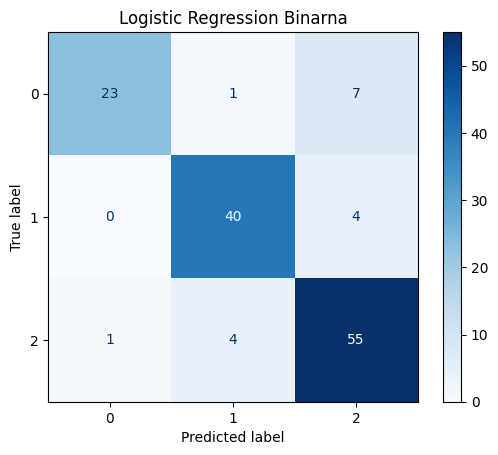


-- MLPClassifier Binarna --
              precision    recall  f1-score   support

     Cthulhu       0.92      0.74      0.82        31
     Dunwich       0.88      0.86      0.87        44
   Innsmouth       0.84      0.93      0.88        60

    accuracy                           0.87       135
   macro avg       0.88      0.85      0.86       135
weighted avg       0.87      0.87      0.87       135



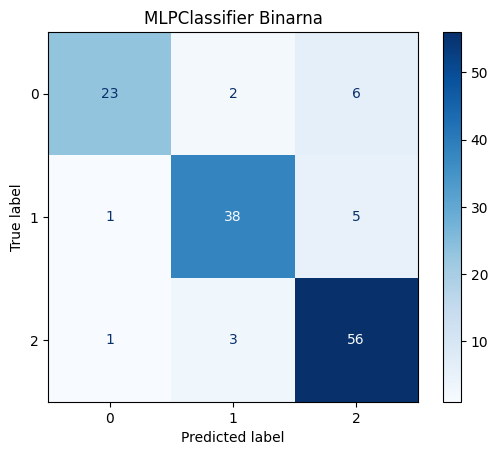


-- SVM Binarna --
              precision    recall  f1-score   support

     Cthulhu       0.94      0.55      0.69        31
     Dunwich       0.90      0.80      0.84        44
   Innsmouth       0.73      0.95      0.83        60

    accuracy                           0.81       135
   macro avg       0.86      0.76      0.79       135
weighted avg       0.83      0.81      0.80       135



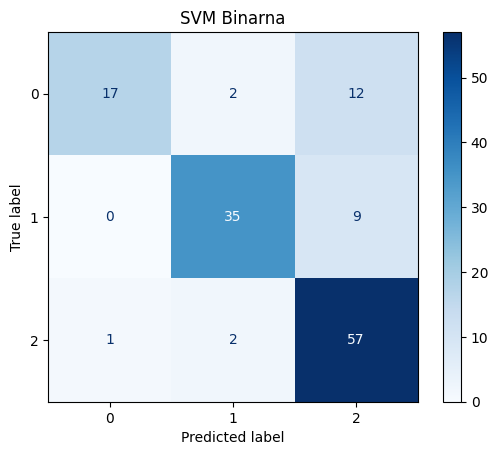


-- Logistic Regression Logarytmiczna --
              precision    recall  f1-score   support

     Cthulhu       0.92      0.71      0.80        31
     Dunwich       0.91      0.89      0.90        44
   Innsmouth       0.82      0.93      0.88        60

    accuracy                           0.87       135
   macro avg       0.88      0.84      0.86       135
weighted avg       0.87      0.87      0.86       135



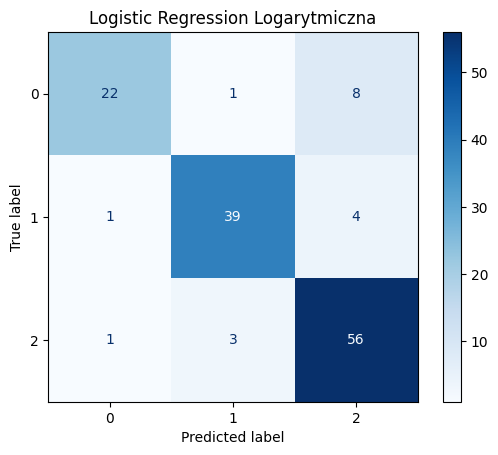


-- MLPClassifier Logarytmiczna --
              precision    recall  f1-score   support

     Cthulhu       0.95      0.68      0.79        31
     Dunwich       0.87      0.89      0.88        44
   Innsmouth       0.81      0.92      0.86        60

    accuracy                           0.85       135
   macro avg       0.88      0.83      0.84       135
weighted avg       0.86      0.85      0.85       135



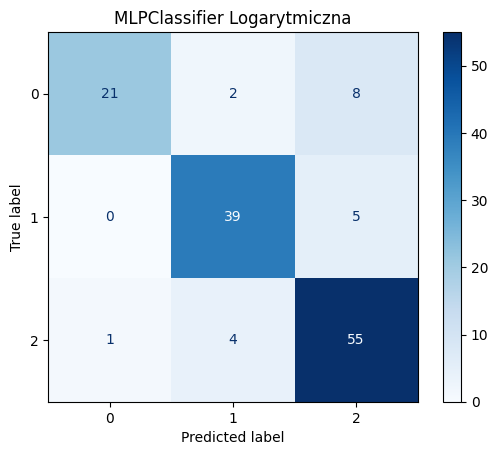


-- SVM Logarytmiczna --
              precision    recall  f1-score   support

     Cthulhu       0.94      0.55      0.69        31
     Dunwich       0.90      0.80      0.84        44
   Innsmouth       0.73      0.95      0.83        60

    accuracy                           0.81       135
   macro avg       0.86      0.76      0.79       135
weighted avg       0.83      0.81      0.80       135



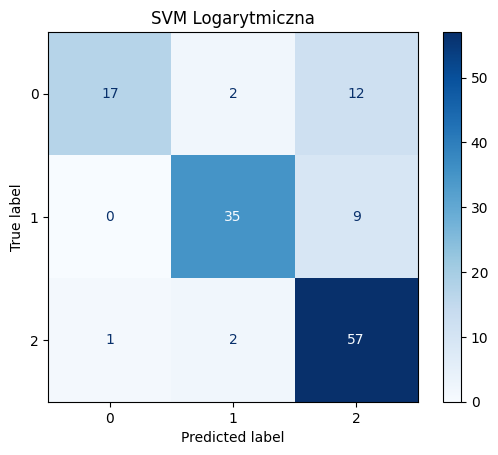


-- Logistic Regression TFIDF --
              precision    recall  f1-score   support

     Cthulhu       0.92      0.71      0.80        31
     Dunwich       0.91      0.91      0.91        44
   Innsmouth       0.84      0.93      0.88        60

    accuracy                           0.87       135
   macro avg       0.89      0.85      0.86       135
weighted avg       0.88      0.87      0.87       135



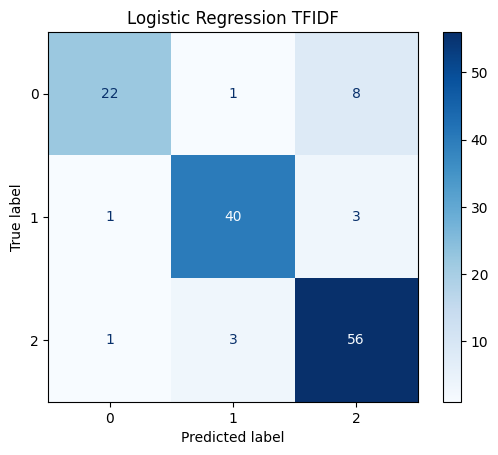


-- MLPClassifier TFIDF --
              precision    recall  f1-score   support

     Cthulhu       0.92      0.71      0.80        31
     Dunwich       0.80      0.91      0.85        44
   Innsmouth       0.84      0.85      0.84        60

    accuracy                           0.84       135
   macro avg       0.85      0.82      0.83       135
weighted avg       0.84      0.84      0.84       135



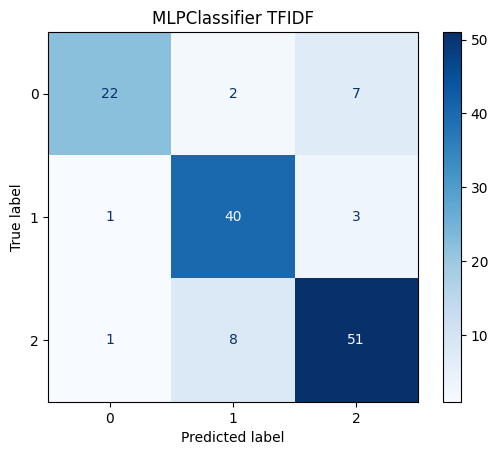


-- SVM TFIDF --
              precision    recall  f1-score   support

     Cthulhu       1.00      0.42      0.59        31
     Dunwich       1.00      0.80      0.89        44
   Innsmouth       0.69      1.00      0.82        60

    accuracy                           0.80       135
   macro avg       0.90      0.74      0.76       135
weighted avg       0.86      0.80      0.79       135



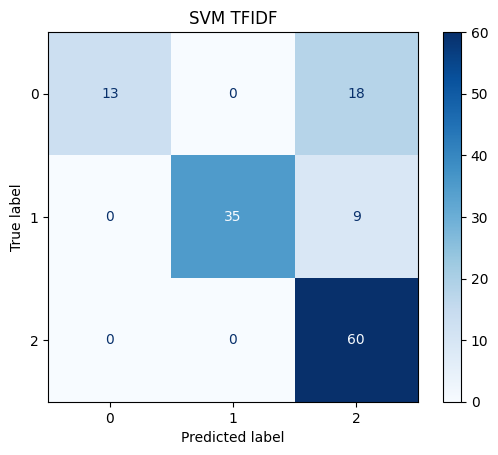


-- Logistic Regression Word2Vec --
              precision    recall  f1-score   support

     Cthulhu       0.57      0.65      0.61        31
     Dunwich       0.63      0.59      0.61        44
   Innsmouth       0.83      0.82      0.82        60

    accuracy                           0.70       135
   macro avg       0.68      0.68      0.68       135
weighted avg       0.71      0.70      0.70       135



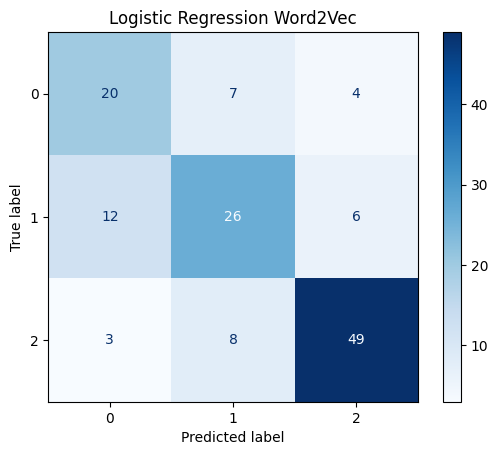


-- MLPClassifier Word2Vec --
              precision    recall  f1-score   support

     Cthulhu       0.71      0.71      0.71        31
     Dunwich       0.67      0.73      0.70        44
   Innsmouth       0.88      0.82      0.84        60

    accuracy                           0.76       135
   macro avg       0.75      0.75      0.75       135
weighted avg       0.77      0.76      0.77       135



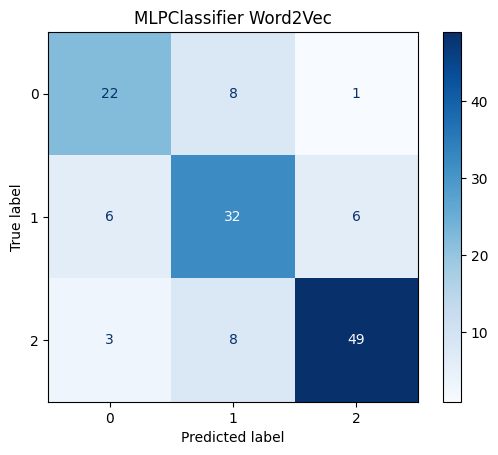


-- SVM Word2Vec --
              precision    recall  f1-score   support

     Cthulhu       0.40      0.71      0.51        31
     Dunwich       0.52      0.34      0.41        44
   Innsmouth       0.75      0.63      0.68        60

    accuracy                           0.56       135
   macro avg       0.55      0.56      0.54       135
weighted avg       0.59      0.56      0.56       135



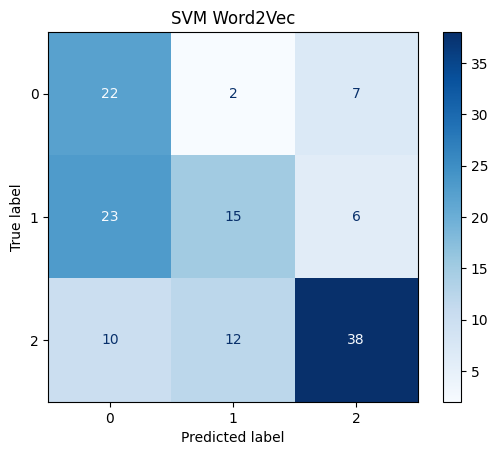

In [ ]:
klasyfikacja("Binarna", models, X_binary, true_labels_paragraphs)
klasyfikacja("Logarytmiczna", models, X_log, true_labels_paragraphs)
klasyfikacja("TFIDF", models, X_tfidf, true_labels_paragraphs)
klasyfikacja("Word2Vec", models, X_embeddings, true_labels_paragraphs)

# Analiza wyników klasyfikacji

### 1. Podsumowanie wyników

* **Najlepsze wyniki (najwyższa dokładność i f1-score) uzyskane zostały z Logistic Regression i MLP na wagach binarnych, logarytmicznych oraz TfIdf.**
  Dokładność oscyluje wokół 0.84–0.87, a makro f1-score w podobnym zakresie (ok. 0.85–0.87).

* **Najgorsze wyniki dają klasyfikatory SVM, szczególnie dla klasy Cthulhu, gdzie recall jest stosunkowo niski (\~0.55 dla wag binarnych, logarytmicznych i TfIdf).**
  Co wpływa na niższą ogólną skuteczność (ok. 0.80 i niżej).

* **Word embeddings (Word2Vec) dają wyraźnie słabsze wyniki dla wszystkich trzech klasyfikatorów, z dokładnością w przedziale 0.56–0.76 i słabszym f1-score (około 0.54–0.77).**

### 2. Wybór najlepszego klasyfikatora

Spośród wszystkich wyników, najlepsze osiągi i najbardziej stabilne wyniki mają klasyfikatory oparte na **Logistic Regression z binarnymi, logarytmicznymi i TfIdf wagami**. Dokładność 0.87 i macro f1-score około 0.86–0.87 świadczą o dobrym dopasowaniu modelu.

Najlepszym okazuje się jednak Logistic Regression z binarnymi wagami** (dokładność 87%, f1-score \~0.87), ze względu na lekko lepsze wyniki w porównaniu do wersji logarytmicznej i TfIdf (bardzo podobne, ale binarna wersja ma minimalnie wyższe precision dla klasy Dunwich i f1 dla Cthulhu).

### 3. Interpretacja klasyfikatora Logistic Regression, wagi binarne

* **Precision (precyzja)** mówi nam, jak dużo przewidzianych przykładów danej klasy faktycznie do niej należy.
  Najwyższa jest dla Dunwich (0.89) i Cthulhu (0.96), co oznacza, że model rzadko błędnie oznacza paragrafy jako z tych książek.

* **Recall (czułość)** mówi, jak dużo rzeczywistych przykładów danej klasy zostało poprawnie wykrytych.
  Najniższy recall jest dla Cthulhu (0.74), co wskazuje, że model nie wykrywa część klasyfikuje błędnie jako inne książki.
  Dla Dunwich i Innsmouth recall jest wyższy (odpowiednio 0.91 i 0.92), więc te klasy są lepiej wykrywane.

* **F1-score** to kompromis między precision i recall. Najniższe jest dla Cthulhu (0.84), najwyższe dla Dunwich (0.90), co oznacza, że Dunwich jest najlepiej rozpoznawaną klasą.

* **Skuteczność całkowita (\~87%)** to bardzo dobry wynik w zadaniu klasyfikacji tekstów, zwłaszcza że mamy trzy klasy i teksty literackie, które mogą być podobne stylistycznie.

### 4. Wnioski dodatkowe

* Wagi binarne, mimo że prostsze, dały wyniki nie gorsze, a często lepsze niż bardziej złożone wagi TfIdf czy logarytmiczne.

* Słabsze wyniki word embeddings mogą wynikać z faktu, że klasyfikator bazuje na uśrednionych reprezentacjach semantycznych, które mogły nie uchwycić specyficznych cech odróżniających poszczególne książki.

* SVM wypada gorzej, co może być spowodowane doborem parametrów lub naturą danych (np. liniowa separowalność może być słabsza w przestrzeni cech używanych przez SVM).

---

### Podsumowanie

Najlepiej wybrać **Logistic Regression na binarnych wagach cech** jako klasyfikator, który:

* osiąga najwyższą dokładność i dobry balans między precision a recall,
* dobrze radzi sobie z rozpoznawaniem każdej z trzech książek,
* jest prosty do interpretacji i efektywny obliczeniowo.

# Porównanie nastroju

Opis

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.9 MB/s eta 0:00:00


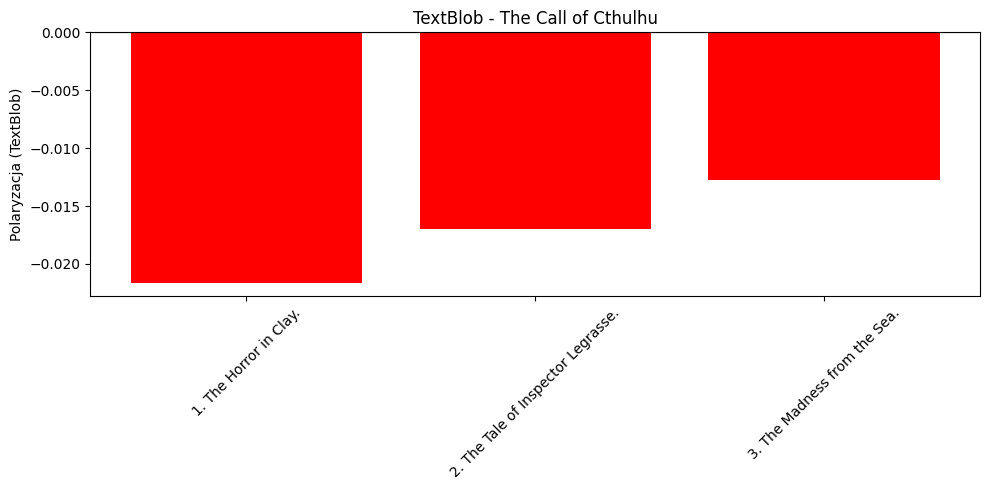

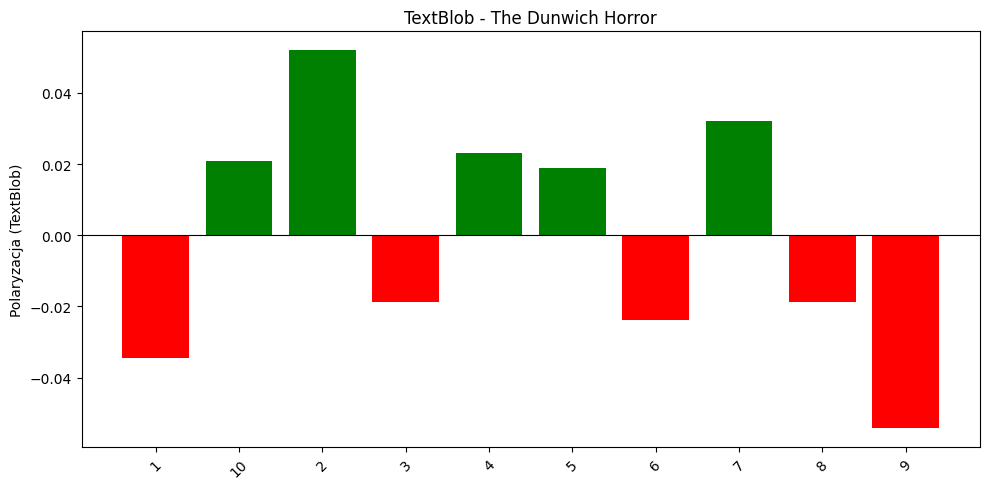

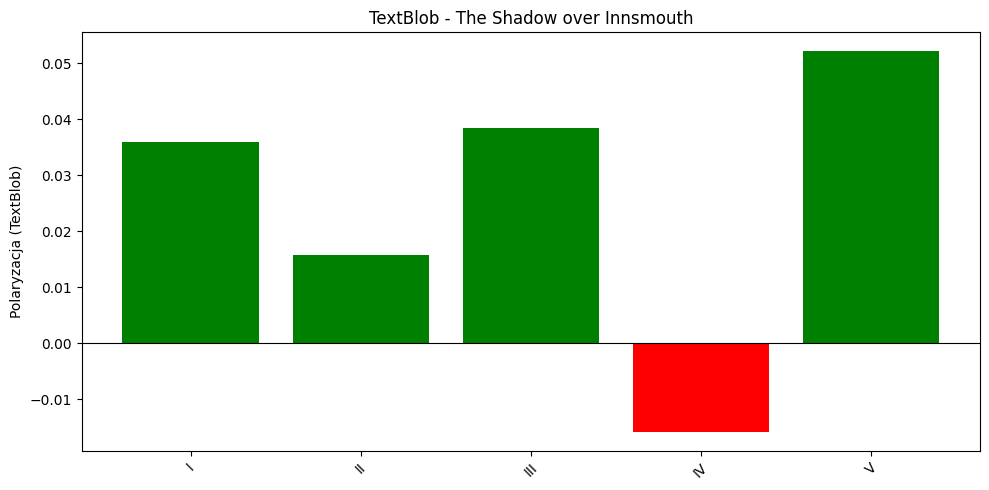

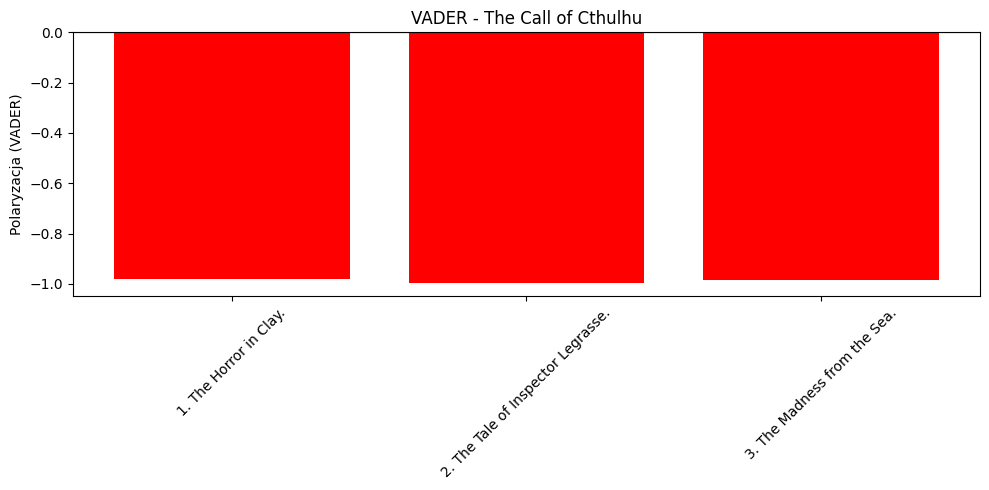

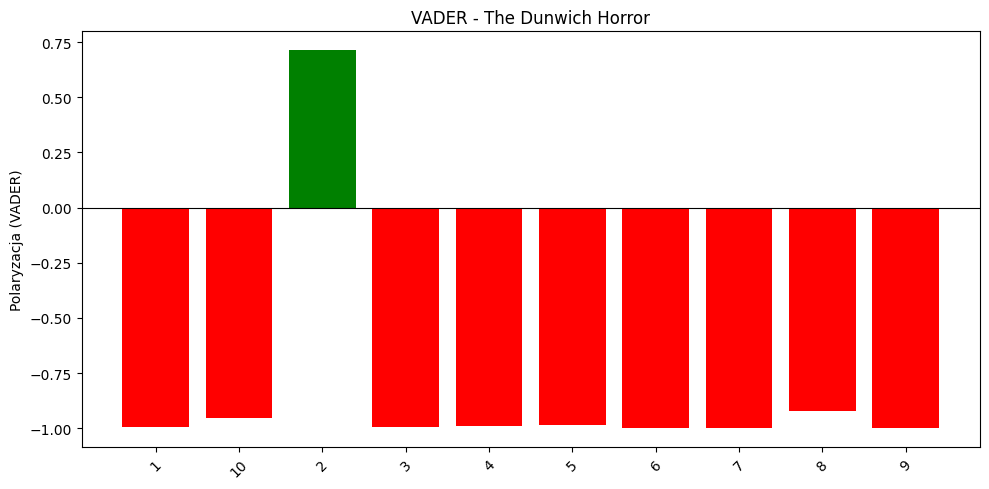

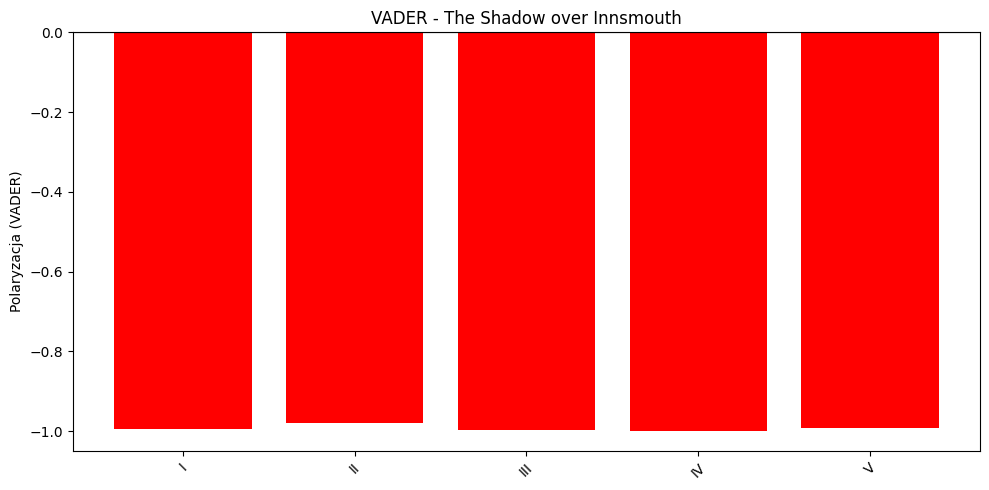

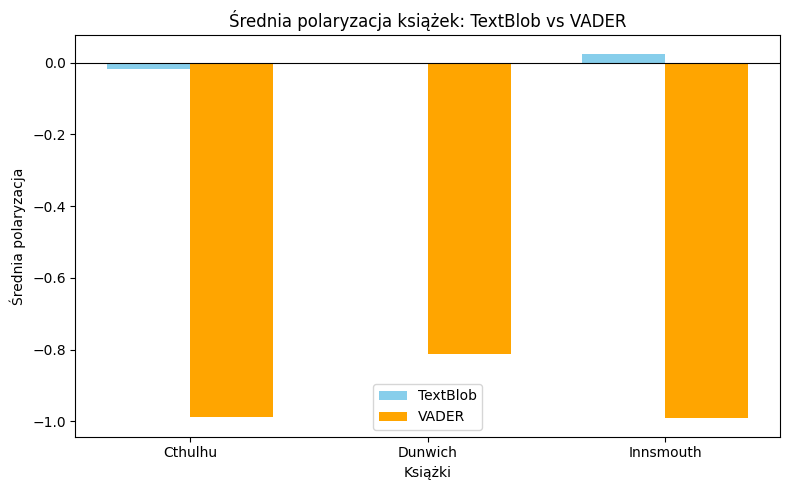

In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

# Funkcja analizująca sentyment rozdziałów książki z użyciem TextBlob
def analyze_book_sentiment_textblob(book_tokens_dict):
    blob_scores = {}
    for chapter_id, tokens in book_tokens_dict.items():
        text = " ".join(tokens)
        blob = TextBlob(text)
        blob_scores[chapter_id] = blob.sentiment.polarity
    return blob_scores

# Funkcja analizująca sentyment rozdziałów książki z użyciem VADER
def analyze_book_sentiment_vader(book_tokens_dict):
    vader_scores = {}
    analyzer = SentimentIntensityAnalyzer()
    for chapter_id, tokens in book_tokens_dict.items():
        text = " ".join(tokens)
        vader_result = analyzer.polarity_scores(text)
        vader_scores[chapter_id] = vader_result['compound']
    return vader_scores

# Analiza każdej książki
blob_cth = analyze_book_sentiment_textblob(processed_The_Call_of_Cthulu)
blob_dun = analyze_book_sentiment_textblob(processed_The_Dunwich_Horror)
blob_inn = analyze_book_sentiment_textblob(processed_The_Shadow_over_Innsmouth)

vader_cth = analyze_book_sentiment_vader(processed_The_Call_of_Cthulu)
vader_dun = analyze_book_sentiment_vader(processed_The_Dunwich_Horror)
vader_inn = analyze_book_sentiment_vader(processed_The_Shadow_over_Innsmouth)

# Funkcja do rysowania wykresów słupkowych rozdziałów
def plot_chapter_scores(scores_dict, title, ylabel="Polaryzacja", color='blue'):
    labels = list(scores_dict.keys())
    values = list(scores_dict.values())
    colors = ['green' if v >= 0 else 'red' for v in values]
    labels, values, colors = zip(*sorted(zip(labels, values, colors), key=lambda x: x[0]))

    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color=colors)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.tight_layout()
    plt.show()

# Rysowanie wykresów TextBlob
plot_chapter_scores(blob_cth, "TextBlob - The Call of Cthulhu", ylabel="Polaryzacja (TextBlob)")
plot_chapter_scores(blob_dun, "TextBlob - The Dunwich Horror", ylabel="Polaryzacja (TextBlob)")
plot_chapter_scores(blob_inn, "TextBlob - The Shadow over Innsmouth", ylabel="Polaryzacja (TextBlob)")

# Rysowanie wykresów VADER
plot_chapter_scores(vader_cth, "VADER - The Call of Cthulhu", ylabel="Polaryzacja (VADER)")
plot_chapter_scores(vader_dun, "VADER - The Dunwich Horror", ylabel="Polaryzacja (VADER)")
plot_chapter_scores(vader_inn, "VADER - The Shadow over Innsmouth", ylabel="Polaryzacja (VADER)")

# Funkcja do obliczania średniej polaryzacji
def average_score(score_dict):
    return np.mean(list(score_dict.values()))

# Średnie polaryzacje
avg_scores = {
    "TextBlob": {
        "Cthulhu": average_score(blob_cth),
        "Dunwich": average_score(blob_dun),
        "Innsmouth": average_score(blob_inn)
    },
    "VADER": {
        "Cthulhu": average_score(vader_cth),
        "Dunwich": average_score(vader_dun),
        "Innsmouth": average_score(vader_inn)
    }
}

# Rysowanie wykresu średnich polaryzacji dla obu metod
books = ["Cthulhu", "Dunwich", "Innsmouth"]
blob_scores = [avg_scores["TextBlob"][book] for book in books]
vader_scores = [avg_scores["VADER"][book] for book in books]

x = np.arange(len(books))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, blob_scores, width, label="TextBlob", color="skyblue")
plt.bar(x + width/2, vader_scores, width, label="VADER", color="orange")
plt.xlabel("Książki")
plt.ylabel("Średnia polaryzacja")
plt.title("Średnia polaryzacja książek: TextBlob vs VADER")
plt.xticks(x, books)
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()


# Analiza wyników polaryzacji

W analizie sentymentu trzech dzieł H.P. Lovecrafta: The Call of Cthulhu, The Dunwich Horror oraz The Shadow over Innsmouth wykorzystano dwie metody — TextBlob oraz VADER. Obie metody dają interesujące, choć częściowo sprzeczne wyniki, co wynika z różnic w ich podejściu do wykrywania emocji w tekście.

---

W przypadku The Call of Cthulhu, TextBlob wskazuje na bardzo neutralną polaryzację, bliską zeru, we wszystkich rozdziałach: pierwszy rozdział ma polaryzację -0,0217, drugi -0,0170, a trzeci -0,0127. Oznacza to, że tekst jest generalnie neutralny z lekkim odchyleniem ku negatywnemu, co pasuje do mrocznej tematyki horroru, choć TextBlob nie wykrywa silnej emocjonalności. Z kolei VADER pokazuje silnie negatywny charakter emocjonalny tekstu, z wynikami w zakresie od -0,9814 do -0,9982, co jest zgodne z fabułą opowieści o szaleństwie, kultach i kosmicznym horrorze.

---

W przypadku The Dunwich Horror wyniki TextBlob są bardziej zróżnicowane, ale nadal oscylują wokół wartości zerowej, z przykładami rozdziałów: 2 (+0,0520) i 9 (-0,0541). Wahania te oznaczają, że TextBlob dostrzega lekki pozytyw lub negatyw, lecz nie wykrywa mocnych emocji, nawet gdy fabuła staje się mroczna. Natomiast VADER identyfikuje w większości rozdziałów silną negatywność, np. pierwszy rozdział osiąga wynik -0,9954, choć jest jeden wyjątek — rozdział drugi z wynikiem +0,7131, co może sugerować fragment mniej mroczny lub o bardziej neutralnym słownictwie. Ogólnie VADER wskazuje na obecność grozy i niepokoju.

---

W przypadku The Shadow over Innsmouth TextBlob wykazuje lekkie pozytywne polaryzacje, np. rozdział pierwszy ma wynik +0,0360, a piąty +0,0521. W ten sposób metoda ta ocenia tekst jako lekko pozytywny, mimo że fabuła opowiada o przerażeniu i odkrywaniu koszmarnej prawdy. Z kolei VADER ponownie wskazuje na silnie negatywną emocjonalność w całym tekście, z wynikami bliskimi -1, np. rozdział czwarty (-0,9992) i piąty (-0,9919). Wyniki te dobrze odzwierciedlają tematykę degeneracji i fatalnego przeznaczenia bohaterów.

---

Podsumowując, TextBlob generalnie daje polaryzacje bliskie neutralności i nie wychwytuje głębokiej grozy czy niepokoju, co wskazuje na jego słabszą skuteczność w wykrywaniu subtelnej, literackiej grozy. Natomiast VADER konsekwentnie identyfikuje teksty Lovecrafta jako wybitnie negatywne emocjonalnie, co lepiej oddaje mroczny i niepokojący ton jego opowieści.

---

Dla kontekstu fabularnego, The Call of Cthulhu to opowieść o kultach, obłędzie i kosmicznym horrorze. The Dunwich Horror przedstawia historię narodzin potwora, śmierci i zniszczenia. Natomiast The Shadow over Innsmouth to podróż ku koszmarnej prawdzie i własnej degeneracji.


# NRC-Emotion-Lexicon

Wczytanie NRC

In [ ]:
nrc = {}
with open("/content/drive/MyDrive/P01_Projekt/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            word, emotion, value = line.split('\t')
            if int(value) == 1:
                nrc.setdefault(word, []).append(emotion)
        except ValueError:
            print(f"Błąd w linii: {line}")
            continue

print(f"Załadowano {len(nrc)} słów z NRC.")

Załadowano 6468 słów z NRC.


Ten fragment kodu analizuje i wizualizuje emocje w trzech książkach na podstawie słownika NRC. Dla każdej książki sprawdza, które lemmy występują w słowniku emocji NRC, zbiera odpowiadające im emocje i zlicza ich częstość. Następnie tworzy wykres słupkowy pokazujący rozkład emocji. Każda emocja ma przypisany kolor, co ułatwia interpretację wykresu. W efekcie otrzymujemy wizualne i liczbowe podsumowanie emocjonalnego charakteru tekstów w trzech analizowanych dziełach.


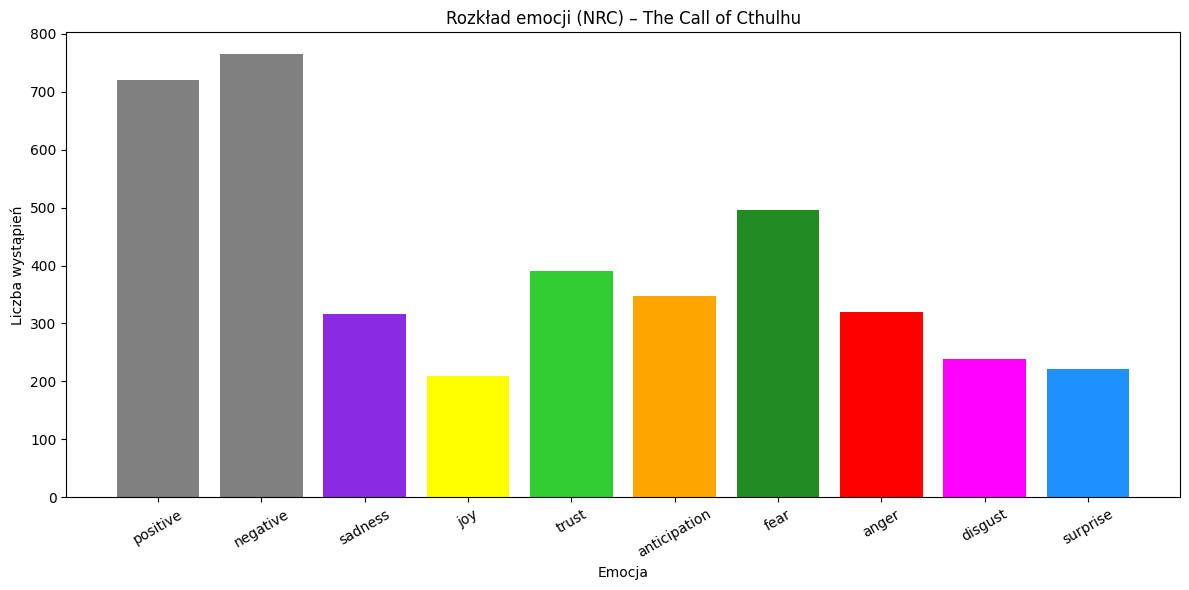

The Call of Cthulhu – Pozytywne: 720, Negatywne: 764


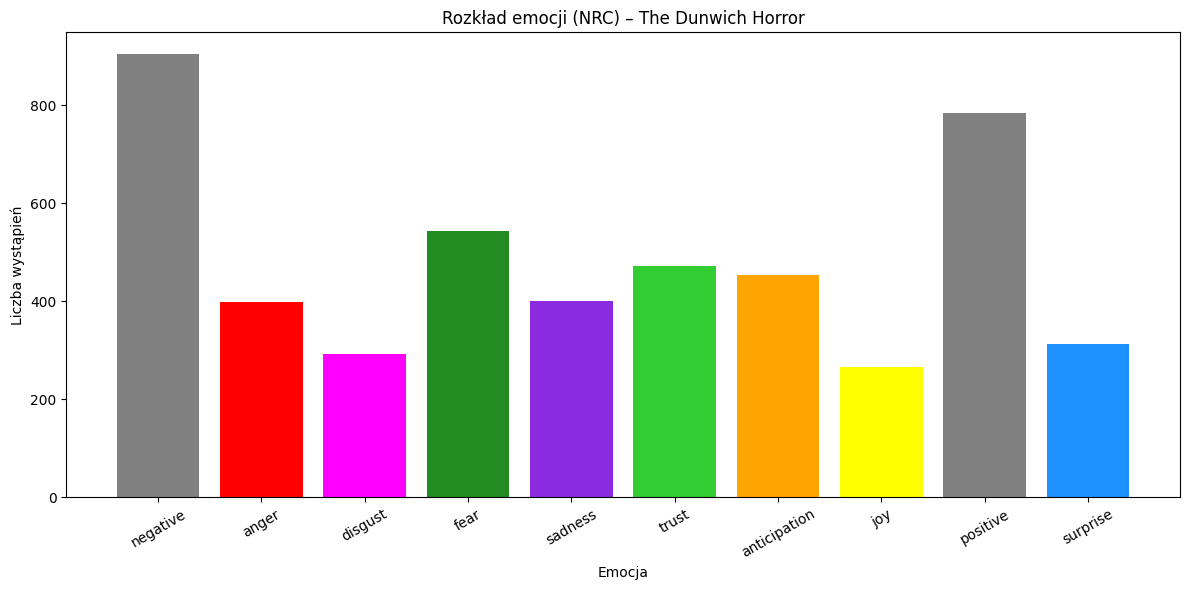

The Dunwich Horror – Pozytywne: 783, Negatywne: 903


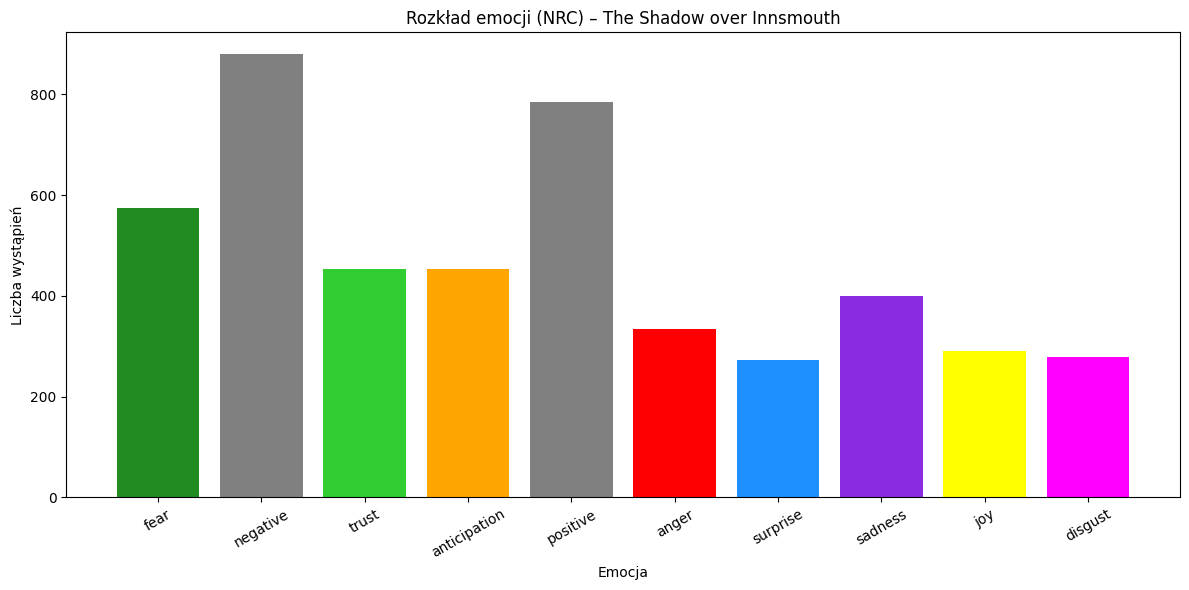

The Shadow over Innsmouth – Pozytywne: 785, Negatywne: 879


In [ ]:
nrc_colors = {
    'trust': 'limegreen',
    'joy': 'yellow',
    'anticipation': 'orange',
    'sadness': 'blueviolet',
    'surprise': 'dodgerblue',
    'disgust': 'magenta',
    'anger': 'red',
    'fear': 'forestgreen'
}

books = {
    "The Call of Cthulhu": words_cthulhu,
    "The Dunwich Horror": words_dunwich,
    "The Shadow over Innsmouth": words_innsmouth
}

for tytul, wszystkie_lematy in books.items():
    emocje = []
    for lemma in wszystkie_lematy:
        if lemma in nrc:
            emocje.extend(nrc[lemma])

    if not emocje:
        print(f"{tytul} – brak słów pasujących do NRC.")
        continue

    licznik_emocji = Counter(emocje)
    licznik_polar = {
        'positive': licznik_emocji.get('positive', 0),
        'negative': licznik_emocji.get('negative', 0)
    }


    fig, ax = plt.subplots(figsize=(12, 6))
    labels = list(licznik_emocji.keys())
    values = list(licznik_emocji.values())
    colors = [nrc_colors.get(em, 'gray') for em in labels]

    ax.bar(labels, values, color=colors)
    ax.set_title(f"Rozkład emocji (NRC) – {tytul}")
    ax.set_xlabel("Emocja")
    ax.set_ylabel("Liczba wystąpień")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

    print(f"{tytul} – Pozytywne: {licznik_polar['positive']}, Negatywne: {licznik_polar['negative']}")


#Analiza wyników rozkładu emocji w książkach

W **„The Call of Cthulhu”** dominują emocje negatywne, choć różnica między liczbą pozytywnych a negatywnych oznaczeń nie jest duża — 720 przypadków pozytywnych wobec 764 negatywnych. Strach (fear) okazuje się najczęściej występującą emocją, co świetnie wpisuje się w tematykę opowieści o kosmicznej grozie, niepojętych siłach i szaleństwie, które ogarnia bohaterów stykających się z tajemnicą Cthulhu. Co ciekawe, na drugim planie pojawia się zaufanie (trust), co może odzwierciedlać rolę wzajemnego wspierania się postaci w odkrywaniu tej przerażającej prawdy, a także wiarę w świadectwa i relacje świadków. Smutek, gniew i oczekiwanie (anticipation) pojawiają się również wyraźnie, co tworzy mieszankę emocji typową dla opowieści, gdzie groza przenika się z desperacją i niepewnością. Radość (joy) jest stosunkowo nieliczna, co podkreśla brak optymizmu w narracji.

W **„The Dunwich Horror”** proporcje są jeszcze bardziej przechylone w stronę negatywnego odbioru, z 903 przypadkami emocji negatywnych i 783 pozytywnych. Tutaj strach ponownie dominuje, co jest naturalne w historii o nadprzyrodzonym zagrożeniu, które budzi grozę wśród mieszkańców i zmusza ich do walki o przetrwanie. Bardzo silnie obecne są również gniew i obrzydzenie (anger i disgust), które odzwierciedlają niechęć, nienawiść i odrazę wobec Wilbura Whateleya i mrocznych sił zagrażających społeczności. Jednocześnie zaufanie oraz oczekiwanie są dość mocno obecne, co może wskazywać na współpracę ludzi przeciwko wspólnemu wrogowi i napięcie związane z próbą pokonania niewyobrażalnego zagrożenia. Radość, choć widoczna, pozostaje na marginesie emocjonalnego pejzażu tej opowieści.

W przypadku **„The Shadow over Innsmouth”** również obserwujemy przewagę emocji negatywnych (879) nad pozytywnymi (785). Najczęściej występującą emocją jest strach, co jest całkowicie spójne z fabułą, w której bohater stopniowo odkrywa przerażającą prawdę o mieście i o samym sobie. Smutek i gniew pojawiają się w związku z narastającym poczuciem osaczenia, odrazy i beznadziejności. Podobnie jak w dwóch pozostałych utworach Lovecrafta, zaufanie i oczekiwanie odgrywają istotną rolę – mogą odzwierciedlać nadzieje bohatera na ratunek lub wsparcie ze strony tych nielicznych, którym można zaufać. Mimo obecności pozytywnych emocji, całościowy obraz pozostaje przytłoczony grozą, fatalizmem i niepokojem.

Podsumowując, we wszystkich trzech utworach Lovecrafta mamy wyraźną dominację strachu jako emocji kluczowej dla budowania atmosfery kosmicznego horroru. Negatywna polaryzacja przeważa nad pozytywną, choć nie są to różnice przytłaczające – raczej subtelne, co pokazuje, że Lovecraft oprócz budowania grozy wplata w swoje historie elementy nadziei, lojalności czy napięcia związanego z walką o ocalenie. Rozkład emocji dobrze oddaje charakter tych opowieści: nieustające poczucie zagrożenia, bezradność wobec sił większych niż człowiek, ale też zmagania z losem i próbę stawienia czoła niewyobrażalnemu złu.

---

Ta analiza częściowo wyjaśnia wyniki TextBloba — mimo że zauważalna jest przewaga emocji negatywnych nad pozytywnymi, dla TextBloba różnica ta może być zbyt subtelna.
